In [1]:
# from IPython.display import HTML

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In this, Jupyter notebook, I used the PhD applications dataset provided by my master thesis advisor. I used basic and known machine learnin methods to predict if the student is accepted, waitlisted or rejected.

Table of Contents
1. Import Libraries
2. Introduction
   - Data Set
   - Variable Description
3. Data Analysis (Visualization)
4. Data Prepocessing
    1. Handling Missing Values
    2. Converting categorical variables to numeric variables. 
5. Overview of the Methods.
    1. Stochastic Gradient Descent
    2. Adaptive Boosting
    3. XGBoost
    4. Neural Networks

6. Applying Machine Learning models to the data with scaling
    1. Decision Tree
    2. Logistic Regression
    3. Random Forest
    4. Stochastic Gradient Descent
    5. KNN
    6. Gaussian Naive Bayes
    7. Perceptron
    8. SVM
    9. Linear SVM
    10. Adaptive Boosting
    11. XGBoost
    12. Which Model is the best ? Table 1  

8. Hyperparameter tuning with Grid Search
9. A few models with the grid search
    1. Decision Tree (DT)
    2. Logistic Regression (LG)
    3. Random Forest (RF)
    4. Stochastic Gradient Descent (SGD
    5. KNN
    6. Gaussian Naive Bayes (GNB)
    7. Perceptron
    8. SVM
    9. Linear SVM
    10. Adaptive Boosting
    11. XGBoost
    12. Cat Boost
    13. Light GBM
    14. Which Model is the best ? Table 4  
10. Implementing h2o AutoML packages
    1. Deep Learning Estimator
    2. Deep Water Estimator
11. Appendix
12. References



# Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import seaborn as sns

import matplotlib.pyplot as plt
import scipy.stats as stats


In [4]:
# For data visualization
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# All the models we will apply
from sklearn import linear_model


from sklearn.model_selection import train_test_split







from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix


#from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier






from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge


from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

In [5]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "MStat"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Introduction


The data used for this analysis was collected from a major Universities Graduate Mathematics Application system for students applying for the Mathematics PHD program. The information is used by the department of mathematics to determine which applicants will be admitted into the graduate program. Each year members of the department of mathematics review each graduate application and give the prospective student a rating score between one and five, five being the best, with all values in between possible. This rating score determines whether an applicant is accepted, rejected, or put on a waitlist for the Universities Mathematics graduate program. 

The rating score (or just RATING) and whether an applicant is accepted, rejected, or put on a waitlist (DECISION) are the variables of interest for this project. The purpose of this research is to create both a regression and classification models that can accurately predict the RATING and DECISION, based on the data submitted by the student. The models we are using includes Random Rorest, Gradient Boosting, Generalized Linear, Stacked Ensemble, XGBoost and Deep learning. 



## Data Set

The data is collected in a spreadsheet for easy visual inspection. Each row of data represents a single applicant identified by a unique identification number. Each application consists of the qualitative and quantitative data described in the table below. Note that he qualitative variables are identified by blue highlighting.The following variables make up the columns of the spreadsheet. Note that some of these fields are optional for the student to submit, so not every field has an entry for every student. This creates an issues of missing data, and later on we will discuss how this issue was dealt with.

In [6]:
from IPython.display import HTML, display
import tabulate

table = [["Applicant Client ID","Application ID"],
         ["Emphasis Area",'First choice of study area'],
         ["Emphasis Area 2",'Secondary choice of study area'],
         ["Emphasis Area 3",'Tertiary choice of area they would like to study area'], 
         ["UU_APPL_CITIZEN","US Citizen (Yes or No)"],
         ["AGE",'Age of the applicant in years'],
         ["SEX",'Gender of the applicant: Male or Female'], 
         ["LOW_INCOME",'If the applicant is coming from low income family'],
         ["UU_FIRSTGEN",'If the appicant is the first generation attending grad school'],
         ["UU_APPL_NTV_LANG","Applicant's native language"], 
         ["HAS_LANGUAGE_TEST",'Foreign Language Exam, if applicable (TOEFL IBT, IELTS, or blank)'],
         ["TEST_READ",'Score on the reading part of TOEFL'],
         ["TEST_SPEAK",'Score on the speaking part of TOEFL'], 
         ["TEST_WRITE",'Score on the writing part of TOEFL'],
         ["TEST_LISTEN",'Score on the listening part of TOEFL'],
         ["MAJOR",'Applicants undergraduate major'], 
         ["GPA",'Applicants GPA'],
         ["NUM_PREV_INSTS",'Number of the previous instituions student studied'],
         ["HAS_GRE_GEN",'If applicant has taken GRE General exam'], 
         ["GRE_VERB",'Raw score on verbal part of the GRE'],
         ["GRE_QUANT",'Raw score on the quantitative part of the GRE'],
         ["GRE_AW",'Raw score on analytical writing part of the GRE'], 
         ["HAS_GRE_SUBJECT",'If applicant has taken GRE Subject exam'],
         ["GRE_SUB",'Raw score on Math subject GRE'],
         ["NUM_RECOMMENDS",'Number of recommenders of the applicant'],
         ["R_AVG_ORAL","Average of recommender's for applicants oral excellence" ], 
         ["R_AVG_WRITTEN","Average of recommender's for applicants oral excellence"],
         ["R_AVG_ACADEMIC","Average of recommender's for applicants oral excellence"], 
         ["R_AVG_KNOWLEDGE","Average of recommender's for applicants oral excellence"],
         ["R_AVG_EMOT","Average of recommender's for applicants oral excellence"],
         ["R_AVG_MOT","Average of recommender's for applicants oral excellence"], 
         ["R_AVG_RES","Average of recommender's for applicants oral excellence"],
         ["R_AVG_RATING","Average of recommender's for applicants oral excellence"],
         ["RATING",'Rating score (any value between 1-5)'], 
         ["DECISION",'Faculty application decision (Accept, Reject, or Waitlist)'], ]
headers = ["Variable", "Description"]
print(display(HTML(tabulate.tabulate(table, headers,tablefmt='html'))))

Variable,Description
Applicant Client ID,Application ID
Emphasis Area,First choice of study area
Emphasis Area 2,Secondary choice of study area
Emphasis Area 3,Tertiary choice of area they would like to study area
UU_APPL_CITIZEN,US Citizen (Yes or No)
AGE,Age of the applicant in years
SEX,Gender of the applicant: Male or Female
LOW_INCOME,If the applicant is coming from low income family
UU_FIRSTGEN,If the appicant is the first generation attending grad school
UU_APPL_NTV_LANG,Applicant's native language


None


The data set includes 759 graduate applications, that were submitted for admission in Fall 2016, Fall 2017, Fall 2018 and Fall 2019. There are various missing data points throughout both the dataset. The tables below describes the number of missing values for each variable for whole data set. Missing data is represented by shorter columns. The bottom of the table lists the various variable names. The top of the table represents how many data entries we have. On the left of the table is the percentage of the missing data for a specific category.  The numbers on the right of the table records the number of variables that each variable has. For example, on the bottom columns starting from TEST_READ, TEST_SPEAK, TEST_WRITE and TETS_LISTEN have shorter columns.

The applicants age (AGE) was calculated using the applicants birthday and is accurate as of 1 January of the year in which they applied. Also, since all universities do not use the same GPA scale, GPA values over four were reviewed and scaled based on information deduced from the applicants resume. 

## Data Analysis

Load the data and see the first four rows of the data.

In [7]:
students =  pd.read_csv('Sergazy_last.csv')
#students.head(4)

Let us have an idea about the data. See the information about it. We will see what kind of variables we have.

In [8]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 36 columns):
Applicant_Client_ID    759 non-null int64
Emphasis Area          759 non-null object
Emphasis Area 2        759 non-null object
Emphasis Area 3        759 non-null object
UU_APPL_CITIZEN        759 non-null object
CTZNSHP                759 non-null object
AGE                    759 non-null float64
SEX                    759 non-null object
LOW_INCOME             759 non-null object
UU_FIRSTGEN            759 non-null object
UU_APPL_NTV_LANG       759 non-null object
HAS_LANGUAGE_TEST      759 non-null object
TEST_READ              272 non-null float64
TEST_SPEAK             272 non-null float64
TEST_WRITE             272 non-null float64
TEST_LISTEN            272 non-null float64
MAJOR                  759 non-null object
GPA                    759 non-null float64
NUM_PREV_INSTS         759 non-null int64
HAS_GRE_GEN            759 non-null object
GRE_VERB               647 non-

There 759 number of observations with 36 columns.

Let us the number of the missing values for each variable.

In [9]:
students.isnull().sum()

Applicant_Client_ID      0
Emphasis Area            0
Emphasis Area 2          0
Emphasis Area 3          0
UU_APPL_CITIZEN          0
CTZNSHP                  0
AGE                      0
SEX                      0
LOW_INCOME               0
UU_FIRSTGEN              0
UU_APPL_NTV_LANG         0
HAS_LANGUAGE_TEST        0
TEST_READ              487
TEST_SPEAK             487
TEST_WRITE             487
TEST_LISTEN            487
MAJOR                    0
GPA                      0
NUM_PREV_INSTS           0
HAS_GRE_GEN              0
GRE_VERB               112
GRE_QUANT              112
GRE_AW                 112
HAS_GRE_SUBJECT          0
GRE_SUB                205
NUM_RECOMMENDS           0
R_AVG_ORAL               0
R_AVG_WRITTEN            0
R_AVG_ACADEMIC           0
R_AVG_KNOWLEDGE          0
R_AVG_EMOT               0
R_AVG_MOT                0
R_AVG_RES                0
R_AVG_RATING             0
RATING                   0
DECISION                 0
dtype: int64

## Data Visualization

Right now let us see the relations between variables via visualization.

In [10]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [11]:
students['DECISION'].value_counts()

Reject      403
Waitlist    242
Admit       114
Name: DECISION, dtype: int64

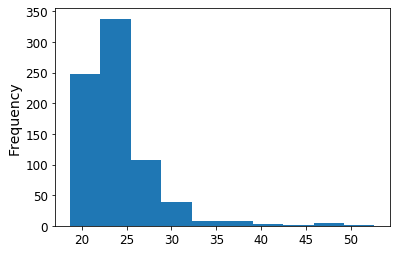

In [12]:
students['AGE'].plot(kind = 'hist')

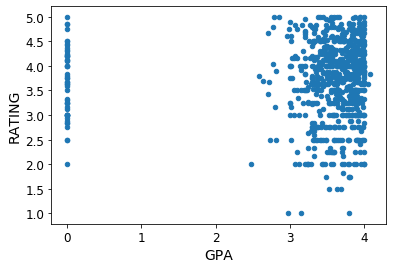

In [13]:
students.plot(kind = 'scatter',x = 'GPA',y = 'RATING')

Saving figure students_rating_GPA_scatterplot


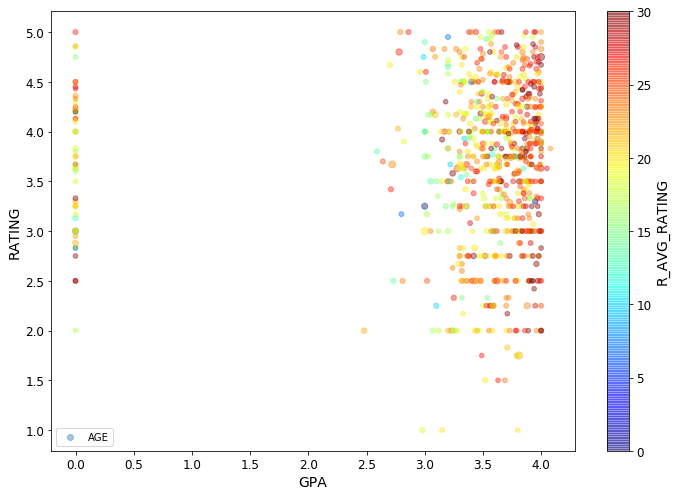

In [14]:
students.plot(kind="scatter", x="GPA", y="RATING", alpha=0.4,
    s=students["AGE"], label="AGE", figsize=(10,7),
    c="R_AVG_RATING", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("students_rating_GPA_scatterplot")

Let us see survival according to the who variable.

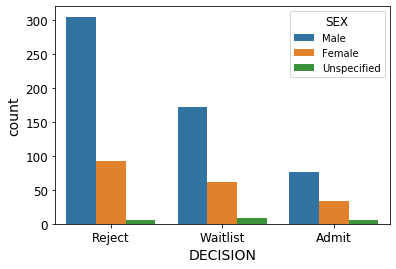

In [15]:
sns.countplot(data = students, x = 'DECISION', hue = 'SEX')

In [16]:
#sns.countplot(data = students, x = 'DECISION', hue = 'MAJOR')

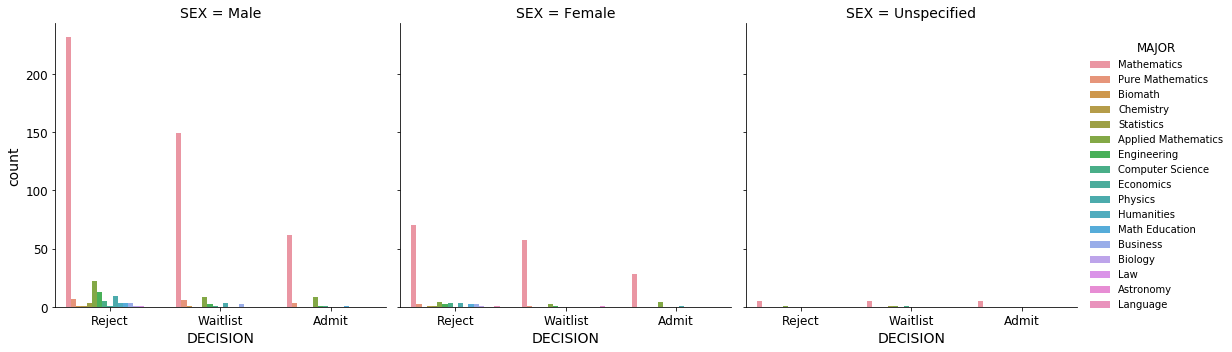

In [17]:
sns.catplot(data = students, x = 'DECISION', hue = 'MAJOR', kind = 'count', col = 'SEX')

These histogram does not tell you much except if unspecified sex has equal number of being accepted,rejected, or waitlisted. 

## Decision according to AGE and GPA

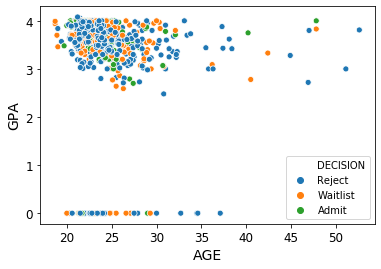

In [18]:
sns.scatterplot(x = 'AGE',y = 'GPA', data =students,hue = 'DECISION')

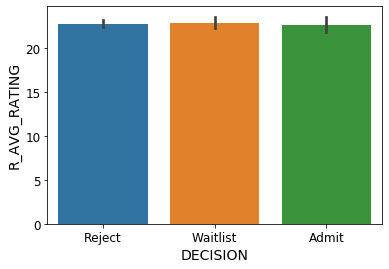

In [19]:
sns.barplot(y = 'R_AVG_RATING',x = 'DECISION', data = students)

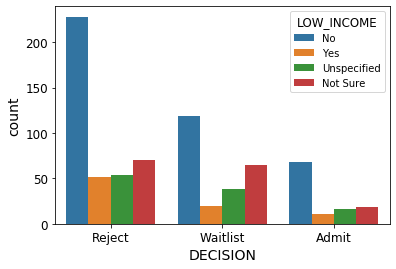

In [20]:
sns.countplot(data = students, x = 'DECISION', hue = 'LOW_INCOME')
#UU_FIRSTGEN            
#UU_APPL_NTV_LANG 

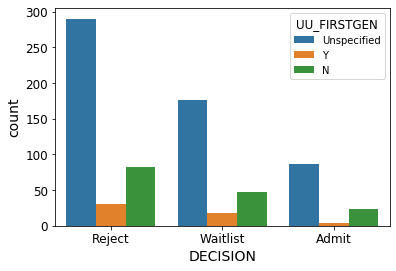

In [21]:
sns.countplot(data = students, x = 'DECISION', hue = 'UU_FIRSTGEN')

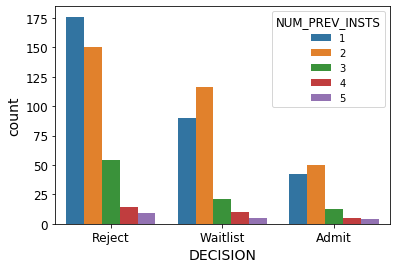

In [22]:
sns.countplot(data = students, x = 'DECISION', hue = 'NUM_PREV_INSTS')

These histograms show that low income, being first generation in your family coming to grad school or number of previous institutions you studied is not much of relavent to get accepted. 

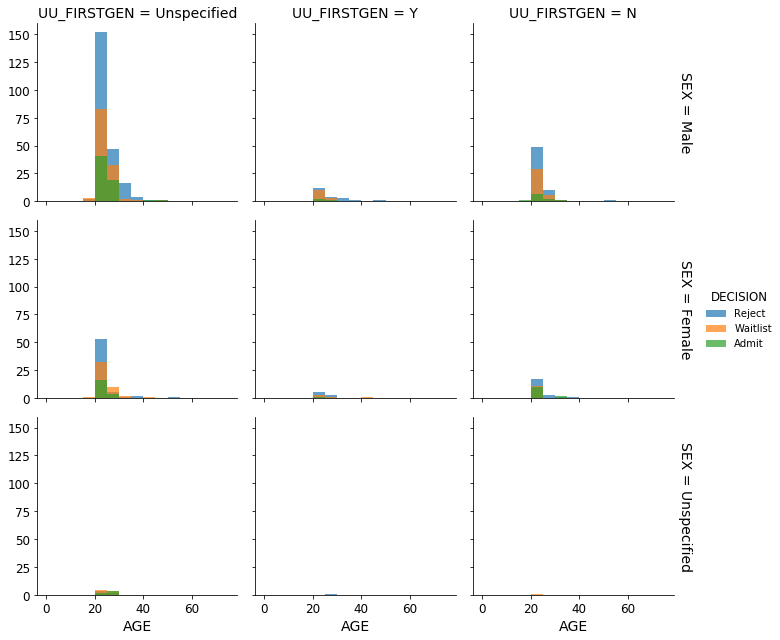

In [23]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(students, row='SEX', col='UU_FIRSTGEN', hue='DECISION', margin_titles=True, height=3, aspect=1.1)
g.map(sns.distplot, 'AGE', kde=False, bins=bins, hist_kws=dict(alpha=0.7))
g.add_legend()  
plt.show()  

Here, We do not any see any blue color in left bottom corner.  We see that unspecified first generation and unspecified sex helped to increase the chance of getting admitted. 

This shows that waitlisted people have higher average than being admitted.

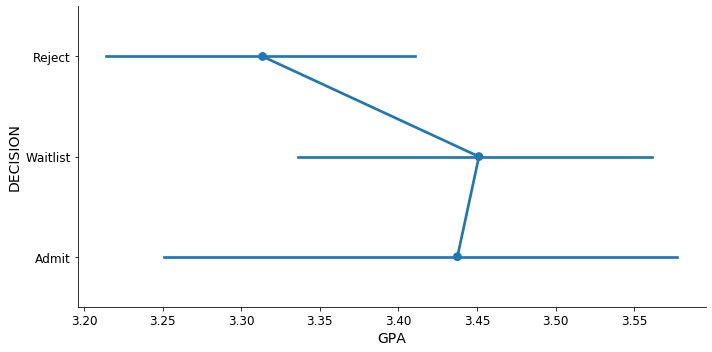

In [24]:
sns.catplot('GPA','DECISION',data = students, aspect = 2.0, kind = 'point' )

Below we see that higher number of previous instutions is better to get admitted.

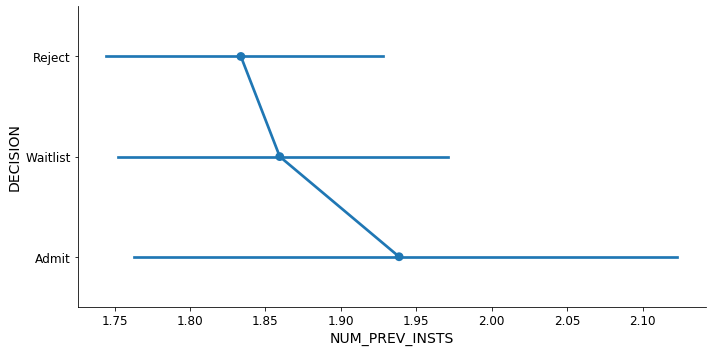

In [25]:
sns.catplot('NUM_PREV_INSTS','DECISION',data = students, aspect = 2.0, kind = 'point' )

### Using groupby to see the relations

In [26]:
print(type(students.groupby('SEX').mean()))
students.groupby('SEX').mean()

<class 'pandas.core.frame.DataFrame'>


,Applicant_Client_ID,AGE,TEST_READ,TEST_SPEAK,TEST_WRITE,TEST_LISTEN,GPA,NUM_PREV_INSTS,GRE_VERB,GRE_QUANT,...,NUM_RECOMMENDS,R_AVG_ORAL,R_AVG_WRITTEN,R_AVG_ACADEMIC,R_AVG_KNOWLEDGE,R_AVG_EMOT,R_AVG_MOT,R_AVG_RES,R_AVG_RATING,RATING
SEX,,,,,,,,,,,,,,,,,,,,,
Female,3.927072e+06,23.865241,26.148936,22.308511,23.744681,25.680851,3.493529,1.877005,155.368750,163.937500,...,3.197861,14.771658,14.660428,16.567914,16.156150,16.290374,17.993048,14.368984,22.209091,3.754545
Male,3.916641e+06,24.333816,27.418981,21.875000,24.476852,26.037037,3.328879,1.853526,156.038217,166.065817,...,3.160940,14.212477,14.263291,16.847920,16.963834,15.775769,17.888969,14.633635,22.992043,3.649747
Unspecified,3.906575e+06,24.073684,27.333333,20.166667,24.222222,22.666667,3.595789,1.789474,153.187500,166.437500,...,3.421053,12.584211,12.963158,16.300000,15.752632,15.005263,16.542105,13.442105,20.826316,4.089474


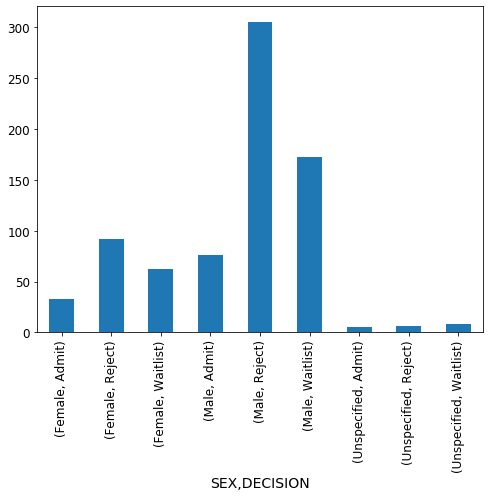

In [27]:
#students.groupby('SEX').sum().plot(kind='bar');
students.groupby(['SEX', 'DECISION'] )['DECISION'].count().plot.bar(figsize=(8, 6));

In [28]:
students.groupby(['SEX', 'DECISION'] )['DECISION'].count().unstack('SEX')

SEX,Female,Male,Unspecified
DECISION,,,
Admit,33,76,5
Reject,92,305,6
Waitlist,62,172,8


In [29]:
students.groupby(['SEX', 'DECISION','UU_FIRSTGEN'] )['DECISION'].count().unstack('SEX')

SEX                   Female   Male  Unspecified
DECISION UU_FIRSTGEN                            
Admit    N              12.0   11.0          NaN
         Unspecified    20.0   62.0          5.0
         Y               1.0    3.0          NaN
Reject   N              22.0   61.0          NaN
         Unspecified    62.0  223.0          5.0
         Y               8.0   21.0          1.0
Waitlist N              11.0   36.0          1.0
         Unspecified    46.0  123.0          7.0
         Y               5.0   13.0          NaN

In [30]:
#students.groupby(['SEX', 'DECISION','UU_FIRSTGEN'] )['DECISION'].count().unstack(1).plot.bar(figsize=(8, 6));

## Data Prepocessing

###  Handling Missing values

In [31]:
students.isnull().sum()

Applicant_Client_ID      0
Emphasis Area            0
Emphasis Area 2          0
Emphasis Area 3          0
UU_APPL_CITIZEN          0
CTZNSHP                  0
AGE                      0
SEX                      0
LOW_INCOME               0
UU_FIRSTGEN              0
UU_APPL_NTV_LANG         0
HAS_LANGUAGE_TEST        0
TEST_READ              487
TEST_SPEAK             487
TEST_WRITE             487
TEST_LISTEN            487
MAJOR                    0
GPA                      0
NUM_PREV_INSTS           0
HAS_GRE_GEN              0
GRE_VERB               112
GRE_QUANT              112
GRE_AW                 112
HAS_GRE_SUBJECT          0
GRE_SUB                205
NUM_RECOMMENDS           0
R_AVG_ORAL               0
R_AVG_WRITTEN            0
R_AVG_ACADEMIC           0
R_AVG_KNOWLEDGE          0
R_AVG_EMOT               0
R_AVG_MOT                0
R_AVG_RES                0
R_AVG_RATING             0
RATING                   0
DECISION                 0
dtype: int64

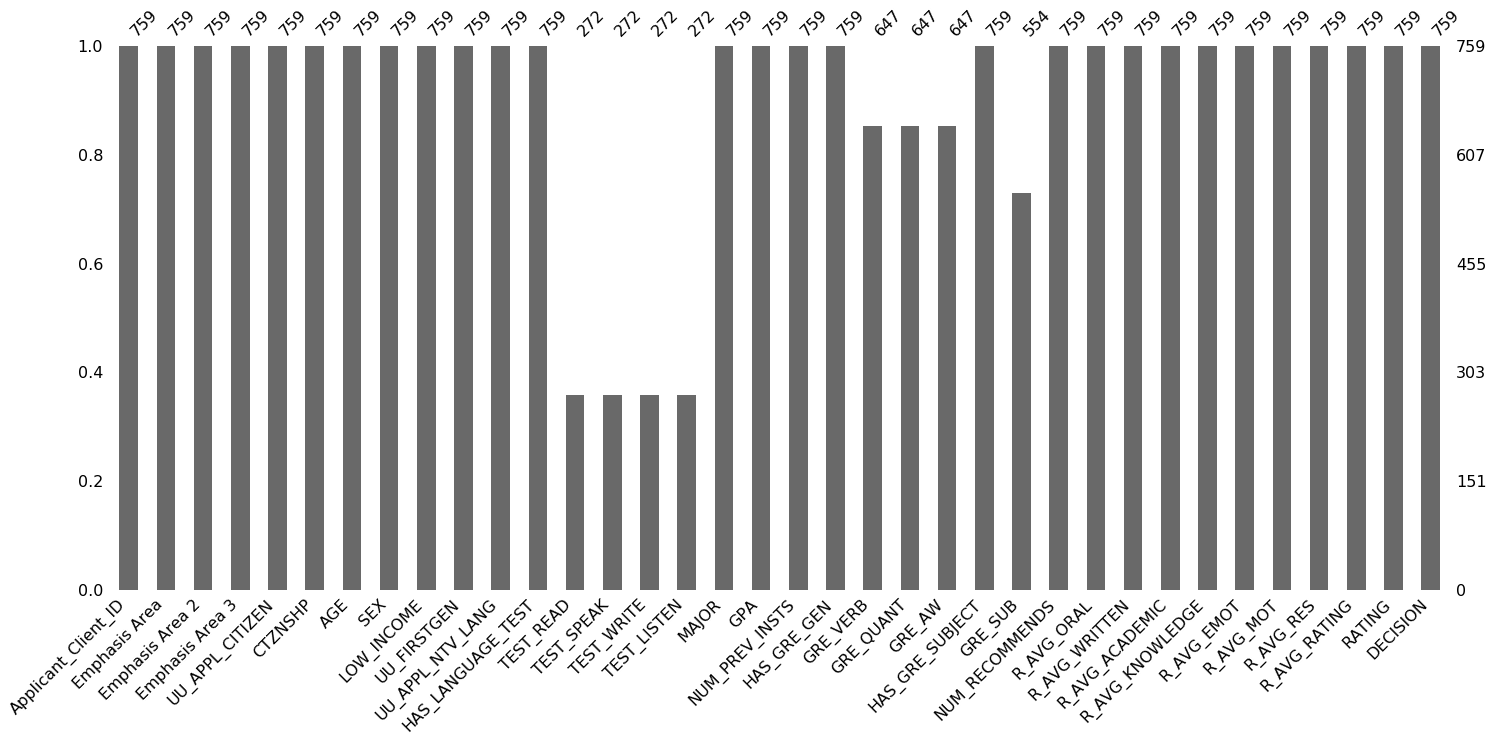

In [32]:
import missingno as msno
fig = plt.figure()
msno.bar(students)
fig.savefig('missing_data.png')

First we drop Applicant_Client_ID.

In [33]:
students = students.drop('Applicant_Client_ID',axis =1)

By looking here, either we can get rid off 8 variables that have missing values or we can fill them mean, median or common values.

First, let us take a look of GPA. We know GPA should not be higher than 4. Let us see if there is GPA higher than 4.

In [34]:
students['GPA'].nlargest(6)

733    4.08
105    4.05
34     4.00
36     4.00
69     4.00
114    4.00
Name: GPA, dtype: float64

These tell us we have two student entered their GPA higher than 4. We will equal them to 4.00 to be consistent. Let us make them equal to 4.00.

In [35]:
students.loc[733,'GPA'] = 4.00
students.loc[105,'GPA'] = 4.00

In [36]:
students.columns

Index(['Emphasis Area', 'Emphasis Area 2', 'Emphasis Area 3',
       'UU_APPL_CITIZEN', 'CTZNSHP', 'AGE', 'SEX', 'LOW_INCOME', 'UU_FIRSTGEN',
       'UU_APPL_NTV_LANG', 'HAS_LANGUAGE_TEST', 'TEST_READ', 'TEST_SPEAK',
       'TEST_WRITE', 'TEST_LISTEN', 'MAJOR', 'GPA', 'NUM_PREV_INSTS',
       'HAS_GRE_GEN', 'GRE_VERB', 'GRE_QUANT', 'GRE_AW', 'HAS_GRE_SUBJECT',
       'GRE_SUB', 'NUM_RECOMMENDS', 'R_AVG_ORAL', 'R_AVG_WRITTEN',
       'R_AVG_ACADEMIC', 'R_AVG_KNOWLEDGE', 'R_AVG_EMOT', 'R_AVG_MOT',
       'R_AVG_RES', 'R_AVG_RATING', 'RATING', 'DECISION'],
      dtype='object')

According to these website, https://www.prepscholar.com/toefl/blog/what-is-the-average-toefl-score/

According to this website, United States's average TOEFL score is for Reading 21, for Listening 23, for Speaking 23, and for Writing 22. Total of these scores is 89. We will see first average scores other students average TOEFL score for each section.

In [37]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#       print(students.head())

In [38]:
students.groupby('SEX').mean()

,AGE,TEST_READ,TEST_SPEAK,TEST_WRITE,TEST_LISTEN,GPA,NUM_PREV_INSTS,GRE_VERB,GRE_QUANT,GRE_AW,...,NUM_RECOMMENDS,R_AVG_ORAL,R_AVG_WRITTEN,R_AVG_ACADEMIC,R_AVG_KNOWLEDGE,R_AVG_EMOT,R_AVG_MOT,R_AVG_RES,R_AVG_RATING,RATING
SEX,,,,,,,,,,,,,,,,,,,,,
Female,23.865241,26.148936,22.308511,23.744681,25.680851,3.493102,1.877005,155.368750,163.937500,3.868750,...,3.197861,14.771658,14.660428,16.567914,16.156150,16.290374,17.993048,14.368984,22.209091,3.754545
Male,24.333816,27.418981,21.875000,24.476852,26.037037,3.328788,1.853526,156.038217,166.065817,3.757962,...,3.160940,14.212477,14.263291,16.847920,16.963834,15.775769,17.888969,14.633635,22.992043,3.649747
Unspecified,24.073684,27.333333,20.166667,24.222222,22.666667,3.595789,1.789474,153.187500,166.437500,3.468750,...,3.421053,12.584211,12.963158,16.300000,15.752632,15.005263,16.542105,13.442105,20.826316,4.089474


## Imputing the Missing Values

In [39]:
g_mean = students.groupby('SEX').mean()
#df.loc[df.Age.isnull() & (df.Sex == 'female'),'Age'] = g_mean['Age']['female']
#df.loc[df.Age.isnull() & (df.Sex == 'male'), 'Age'] = g_mean['Age']['male']

# Fill the TEST_READ
students.loc[students.TEST_READ.isnull() & (students.SEX == 'Male'),'TEST_READ'] = g_mean['TEST_READ']['Male'] 
students.loc[students.TEST_READ.isnull() & (students.SEX == 'Female'),'TEST_READ'] = g_mean['TEST_READ']['Female']
students.loc[students.TEST_READ.isnull() & (students.SEX == 'Unspecified'),'TEST_READ'] = g_mean['TEST_READ']['Unspecified']

# Fill the TEST_SPEAK
students.loc[students.TEST_SPEAK.isnull() & (students.SEX == 'Male'),'TEST_SPEAK'] = g_mean['TEST_SPEAK']['Male'] 
students.loc[students.TEST_SPEAK.isnull() & (students.SEX == 'Female'),'TEST_SPEAK'] = g_mean['TEST_SPEAK']['Female']
students.loc[students.TEST_SPEAK.isnull() & (students.SEX == 'Unspecified'),'TEST_SPEAK'] = g_mean['TEST_SPEAK']['Unspecified']

# Fill the TEST_LISTEN
students.loc[students.TEST_LISTEN.isnull() & (students.SEX == 'Male'),'TEST_LISTEN'] = g_mean['TEST_LISTEN']['Male'] 
students.loc[students.TEST_LISTEN.isnull() & (students.SEX == 'Female'),'TEST_LISTEN'] = g_mean['TEST_LISTEN']['Female']
students.loc[students.TEST_LISTEN.isnull() & (students.SEX == 'Unspecified'),'TEST_LISTEN'] = g_mean['TEST_LISTEN']['Unspecified']

# Fill the TEST_WRITE
students.loc[students.TEST_WRITE.isnull() & (students.SEX == 'Male'),'TEST_WRITE'] = g_mean['TEST_WRITE']['Male'] 
students.loc[students.TEST_WRITE.isnull() & (students.SEX == 'Female'),'TEST_WRITE'] = g_mean['TEST_WRITE']['Female']
students.loc[students.TEST_WRITE.isnull() & (students.SEX == 'Unspecified'),'TEST_WRITE'] = g_mean['TEST_WRITE']['Unspecified']

# Fill the GRE_VERB
students.loc[students.GRE_VERB.isnull() & (students.SEX == 'Male'),'GRE_VERB'] = g_mean['GRE_VERB']['Male'] 
students.loc[students.GRE_VERB.isnull() & (students.SEX == 'Female'),'GRE_VERB'] = g_mean['GRE_VERB']['Female']
students.loc[students.GRE_VERB.isnull() & (students.SEX == 'Unspecified'),'GRE_VERB'] = g_mean['GRE_VERB']['Unspecified']

# Fill the GRE_QUANT
students.loc[students.GRE_QUANT.isnull() & (students.SEX == 'Male'),'GRE_QUANT'] = g_mean['GRE_QUANT']['Male'] 
students.loc[students.GRE_QUANT.isnull() & (students.SEX == 'Female'),'GRE_QUANT'] = g_mean['GRE_QUANT']['Female']
students.loc[students.GRE_QUANT.isnull() & (students.SEX == 'Unspecified'),'GRE_QUANT'] = g_mean['GRE_QUANT']['Unspecified']

# Fill the GRE_AW
students.loc[students.GRE_AW.isnull() & (students.SEX == 'Male'),'GRE_AW'] = g_mean['GRE_AW']['Male'] 
students.loc[students.GRE_AW.isnull() & (students.SEX == 'Female'),'GRE_AW'] = g_mean['GRE_AW']['Female']
students.loc[students.GRE_AW.isnull() & (students.SEX == 'Unspecified'),'GRE_AW'] = g_mean['GRE_AW']['Unspecified']


# Fill the GRE_SUB
students.loc[students.GRE_SUB.isnull() & (students.SEX == 'Male'),'GRE_SUB'] = g_mean['GRE_SUB']['Male'] 
students.loc[students.GRE_SUB.isnull() & (students.SEX == 'Female'),'GRE_SUB'] = g_mean['GRE_SUB']['Female']
students.loc[students.GRE_SUB.isnull() & (students.SEX == 'Unspecified'),'GRE_SUB'] = g_mean['GRE_SUB']['Unspecified']




#students.loc[students.TEST_LISTEN.isnull() & (students.CTZNSHP == 'UNITED STATES'),'TEST_LISTEN'] = listen_mean 
#students.loc[students.TEST_WRITE.isnull() & (students.CTZNSHP == 'UNITED STATES'),'TEST_WRITE'] = write_mean

We will replaces the missing values of any variables with the mean of other observations for particular variable.

In [40]:
students.isnull().sum()

Emphasis Area        0
Emphasis Area 2      0
Emphasis Area 3      0
UU_APPL_CITIZEN      0
CTZNSHP              0
AGE                  0
SEX                  0
LOW_INCOME           0
UU_FIRSTGEN          0
UU_APPL_NTV_LANG     0
HAS_LANGUAGE_TEST    0
TEST_READ            0
TEST_SPEAK           0
TEST_WRITE           0
TEST_LISTEN          0
MAJOR                0
GPA                  0
NUM_PREV_INSTS       0
HAS_GRE_GEN          0
GRE_VERB             0
GRE_QUANT            0
GRE_AW               0
HAS_GRE_SUBJECT      0
GRE_SUB              0
NUM_RECOMMENDS       0
R_AVG_ORAL           0
R_AVG_WRITTEN        0
R_AVG_ACADEMIC       0
R_AVG_KNOWLEDGE      0
R_AVG_EMOT           0
R_AVG_MOT            0
R_AVG_RES            0
R_AVG_RATING         0
RATING               0
DECISION             0
dtype: int64

In [41]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
 #    print(citizenship.get_group('UNITED STATES'))

In [42]:
#students.info()

Let us see the histograms of each variables now.

Saving figure attribute_histogram_plots


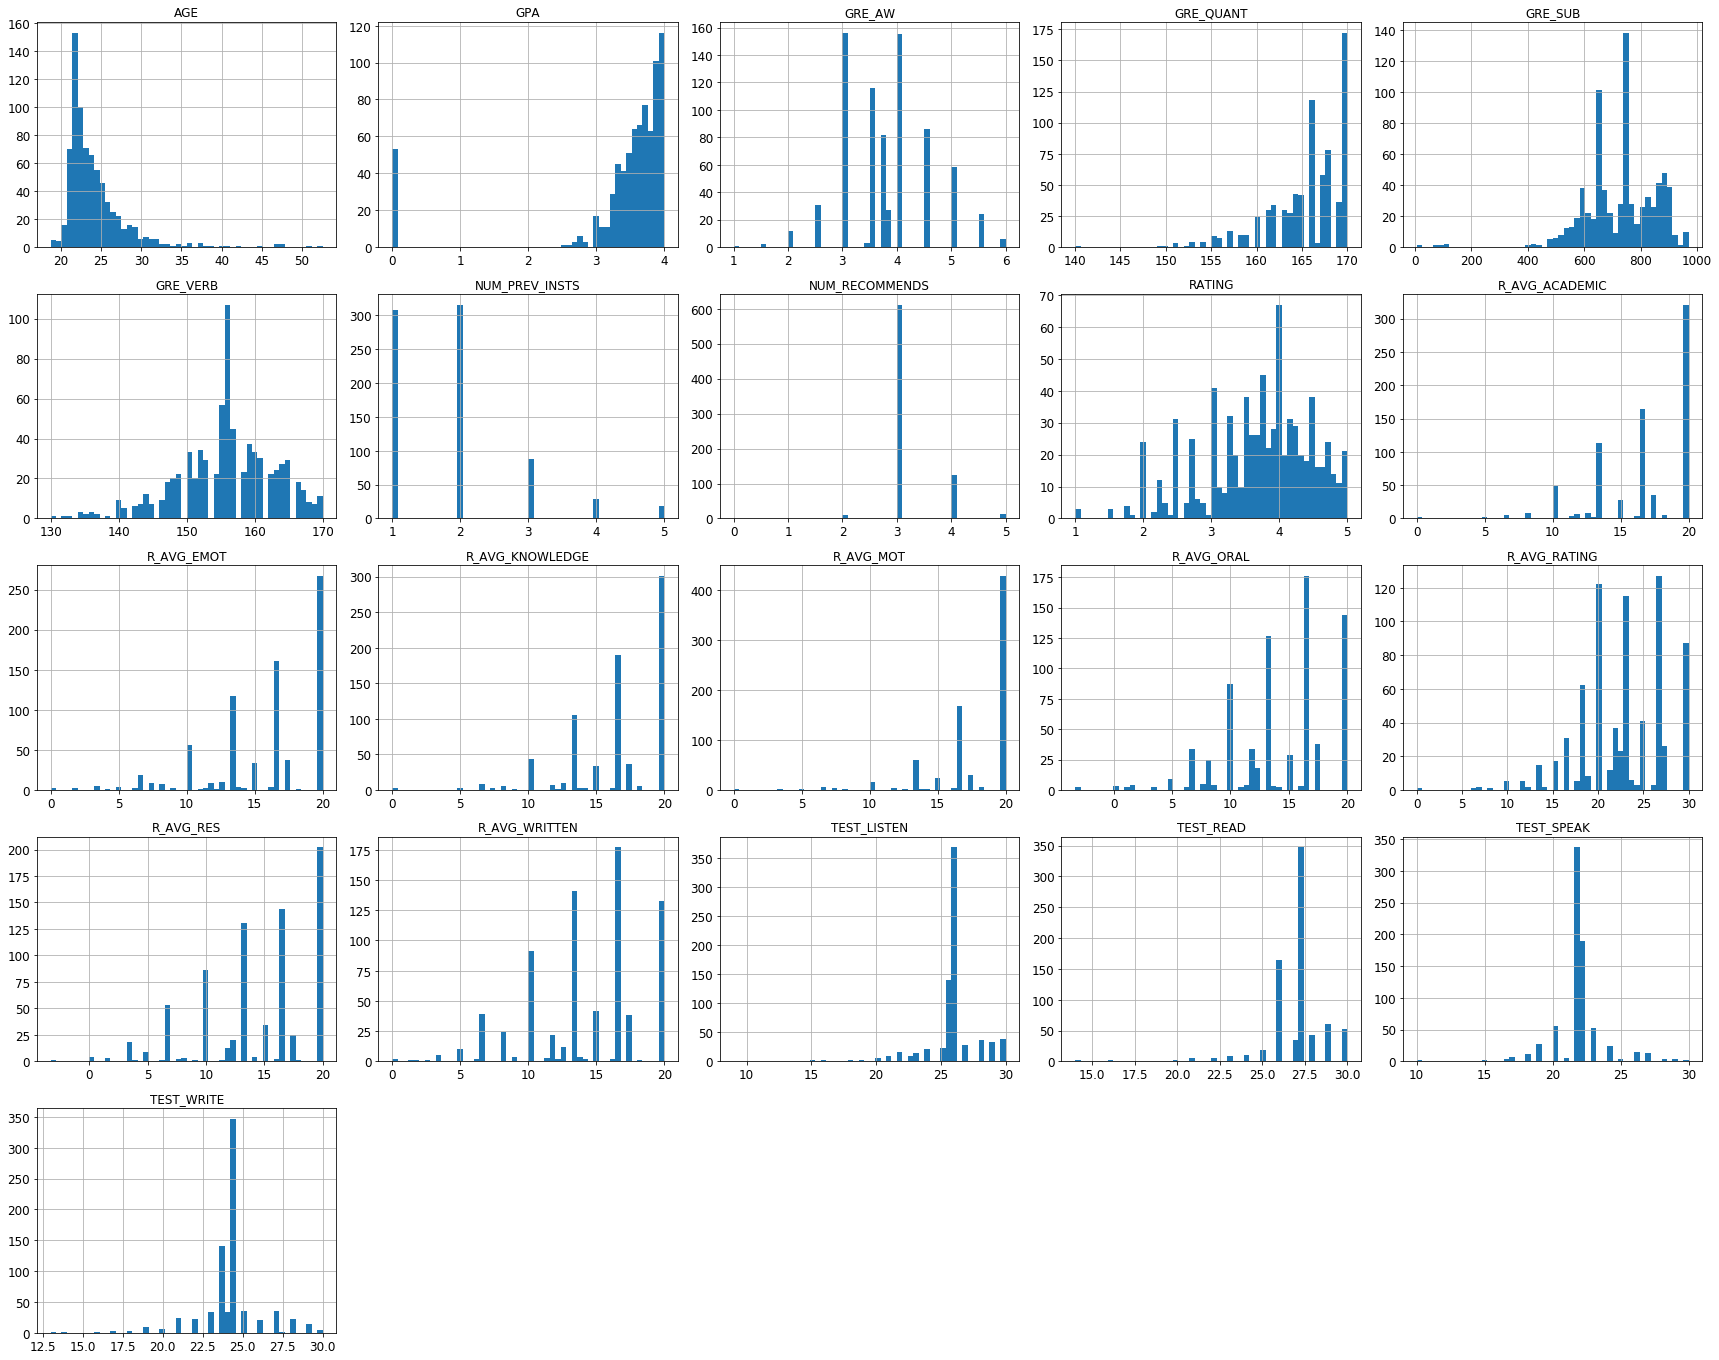

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
students.hist(bins=50, figsize=(24,19))
save_fig("attribute_histogram_plots")
plt.show()

## Target Variable


 mu = 3.69 and sigma = 0.78



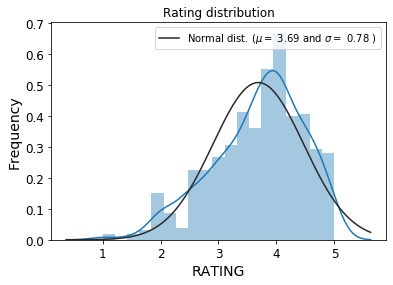

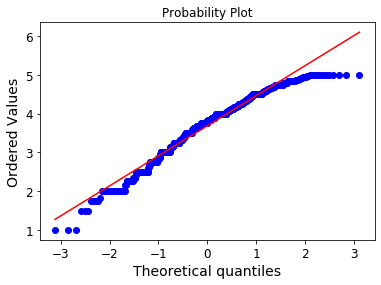

In [44]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
sns.distplot(students['RATING'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(students['RATING'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Rating distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(students['RATING'], plot=plt)
plt.show()

This is slightly left-skewed. But we will keep it this way. 

Now the data almost ready. We would like to convert categorical variables to numeric variables. 

### Converting categorical variables to numeric variables.

In [45]:
#students.head(12)

In [46]:
students_ce = students.copy()

import category_encoders as ce


encoder = ce.BinaryEncoder(cols=['Emphasis Area','Emphasis Area 2','Emphasis Area 3','UU_APPL_CITIZEN',
                                 'CTZNSHP','SEX','LOW_INCOME','UU_FIRSTGEN','UU_APPL_NTV_LANG',
                                 'HAS_LANGUAGE_TEST','HAS_GRE_GEN','HAS_GRE_SUBJECT','MAJOR'
                                 
                                ])
df_binary = encoder.fit_transform(students_ce)

df_binary.head()
df = df_binary
#df_binary.shape
#df_binary.info()

In [47]:
#df.info()

# Overview of the methods.

## Neural Networks

### Building Blocks: Neurons

First, we have to talk about neurons, the basic unit of a neural network. A neuron takes inputs, does some math with them, and produces one output. Here’s what a 2-input neuron looks like:

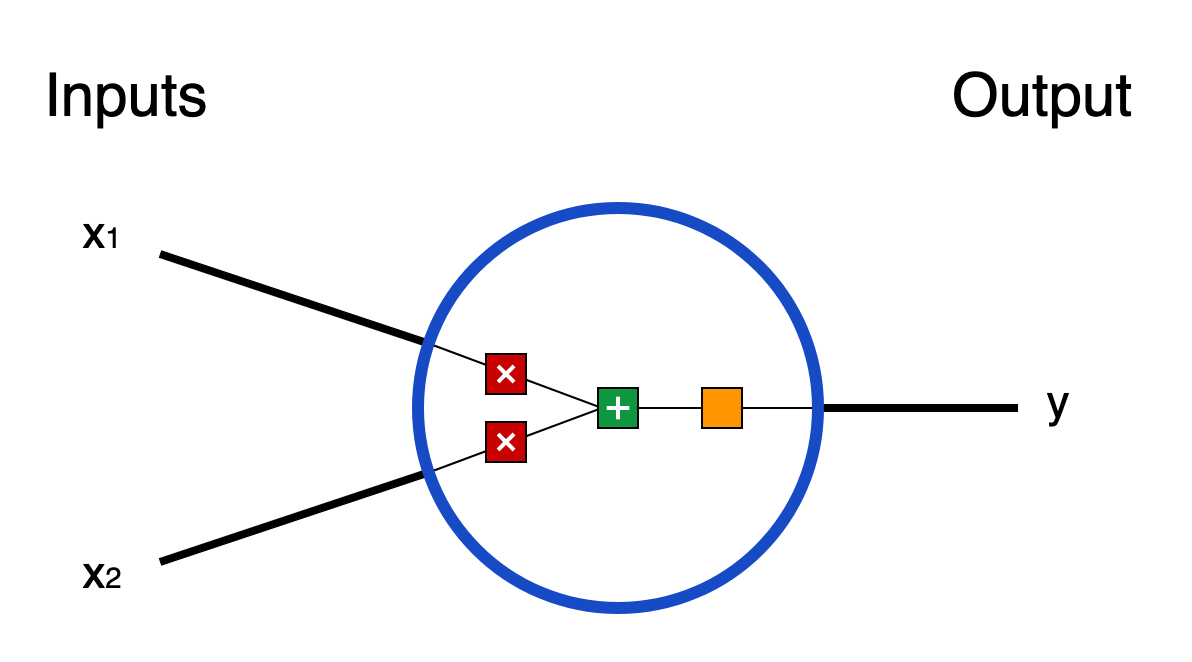

In [48]:
from IPython.display import Image
img_url = 'twoneurons.png'
# by default Image data are embedded
Embed      = Image(img_url)
Embed

3 things are happening here. First, in a red square, each input is multiplied by a weight:

\begin{align}
x_1 & \to x_1* w_1\\
x_2 & \to x_2* w_2\\
\end{align}

Next, in a blue square, all the weighted inputs are added together with a bias b:

$$(x_1*w_1)+(x_2*w_2)+b$$

Finally, in the orange square, the sum is passed through an activation function

$$y=f(x_1*w_1+x_2*w_2+b)$$

The activation function is used to turn an unbounded input into an output that has a nice, predictable form. A commonly used activation function is the sigmoid function:
\begin{equation}
{\displaystyle S(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{e^{x}+1}}.}
\end{equation}

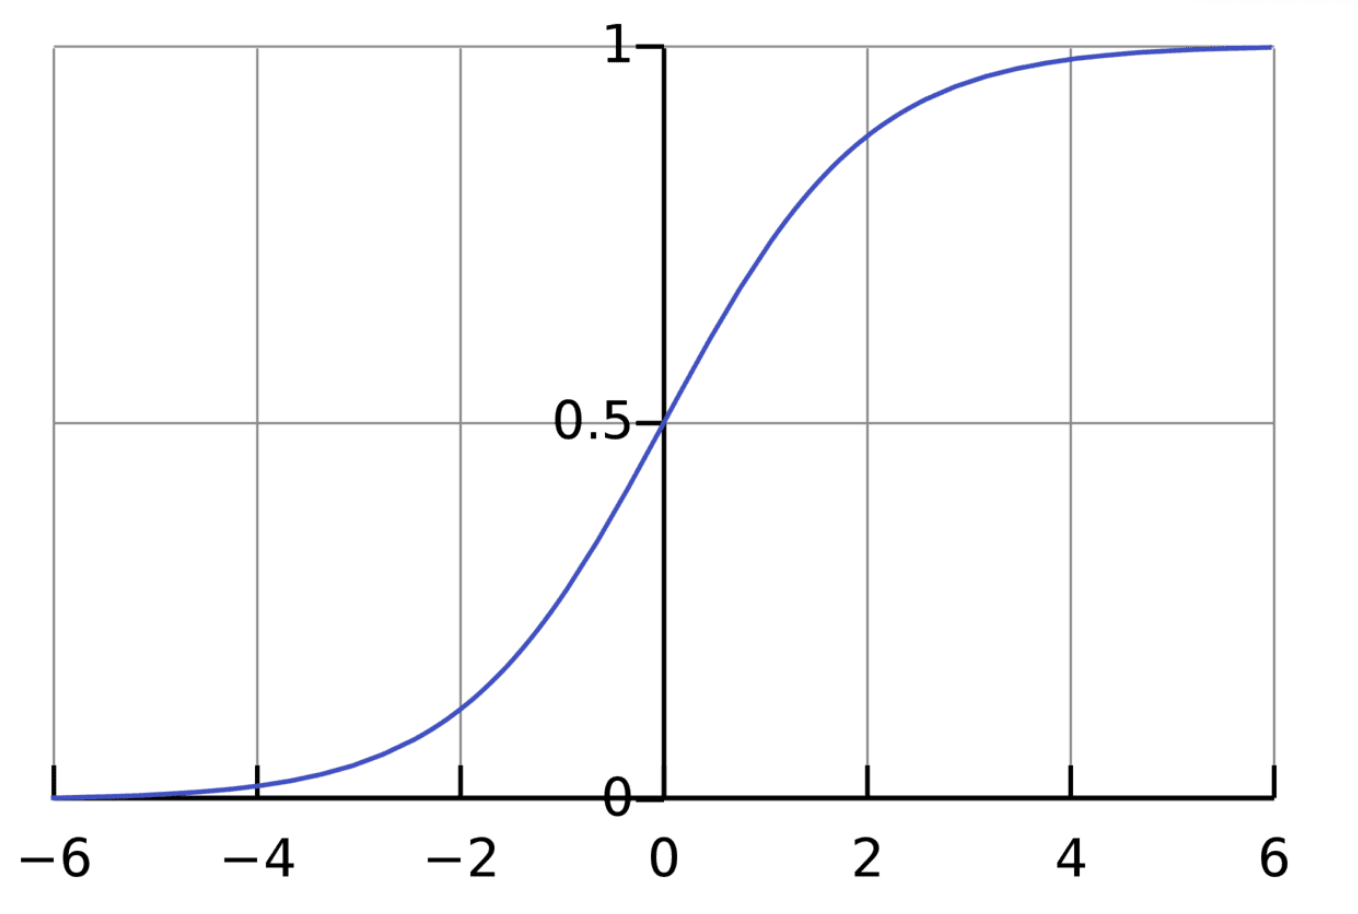

In [49]:
from IPython.display import Image
img_url = 'sigmoid.png'
# by default Image data are embedded
Embed      = Image(img_url)
Embed

The sigmoid function only outputs numbers in the range (0,1). You can think of it as compressing $(-\infty, +\infty)$ to $(0,1)$ - big negative numbers become $\sim 0$, and big positive numbers become $\sim 1$

A sigmoid function is a bounded, differentiable, real function that is defined for all real input values and has a non-negative derivative at each point. A sigmoid "function" and a sigmoid "curve" refer to the same object.

### A Simple Example

Assume we have a 2-input neuron that uses the sigmoid activation function and has the following parameters:

\begin{align}
w &=(0,1) \\
b & = 4\\
\end{align}

where $w_1=0$ and $w_2=1$. Now, let’s give the neuron an input of $x=(2,3)$. We’ll use the dot product to write things more concisely:
\begin{align}
(w*x)+b= & ((w_1*x_1)+(w_2*x_2))+b \\
=& 0*2+1*3+4\\
=& 7\\
y=f(w*x+b)=&f(7)=1 / (1 + e^{-7})= 0.999
\end{align}

The neuron outputs 0.999 given the inputs $x=(2,3)$. That’s it! This process of passing inputs forward to get an output is known as feedforward.

### Combining Neurons into a Neural Network

A neural network is nothing more than a bunch of neurons connected together. Here’s what a simple neural network might look like:

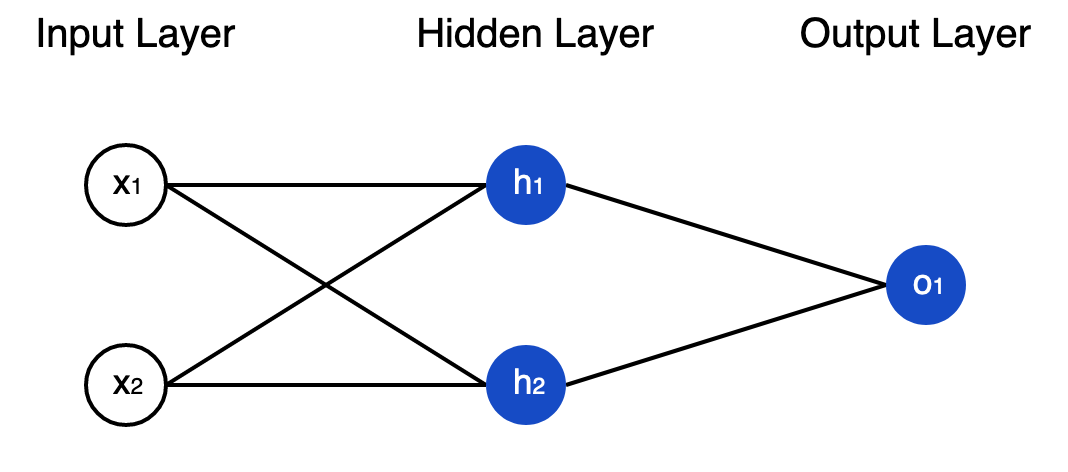

In [50]:
img_url = 'neuralnetwork.png'
# by default Image data are embedded
Embed      = Image(img_url)
Embed

This network has 2 inputs, a hidden layer with 2 neurons $(h_1$ and $h_2)$, and an output layer with $1$ neuron $(o_1)$. Notice that the inputs for $o_1$ are the outputs from $h_1$and $h_2$- that’s what makes this a network.

A **hidden layer** is any layer between the input (first) layer and output (last) layer. There can be multiple hidden layers!

### An Example: Feedforward

Let’s use the network pictured above and assume all neurons have the same weights $w=(0,1)$, the same bias $b = 0$, and the same sigmoid activation function. Let $h_1, h_2, o_1$ denote the outputs of the neurons they represent.

What happens if we pass in the input $x = (2, 3)$?

\begin{align}
h_1=h_2&=f(w* x+b) \\
&=f((0* 2)+(1* 3)+0)\\
&=f(3)\\
&=1 / (1 + e^{-3})\\
&=0.9526 \\
o_1&=f(w* (h_1,h_2)+b)\\
&=f((0* h_1)+(1* h_2)+0)\\
&=f(0.9526)\\
&=1 / (1 + e^{-0.9526})\\
&=0.7216
\end{align}

The output of the neural network for input $x = (2, 3)$ is 0.7216. Pretty simple, right?

A neural network can have any number of layers with any number of neurons in those layers. The basic idea stays the same: feed the input(s) forward through the neurons in the network to get the output(s) at the end. For simplicity, we’ll keep using the network pictured above for the rest of this topic.

## Training a Neural Network

Say we have the following measurements: 

In [51]:
# print("Name    \tWeight(lb)\tHeight (in) \tGender")
# print("========\t=========\t===========\t===========")
# print("Alice   \t133       \t65         \tF")
# print("Bob     \t160       \t72         \tM")
# print("Charlie   \t152       \t70         \tM")
# print("Diana    \t120        \t60         \tF")

| Name          | Weight(lb)    | Height(in) | Gender | 
| ------------- |:-------------:| ---------: | -------|
| Alice         | 132           |  65        |   F    |
| Bob           | 160           |    72      |      M |
| Charlie       | 152           |     75     |     M  |
| Diana         | 120           |      60    |      F |

Let’s train our network to predict someone’s gender given their weight and height:

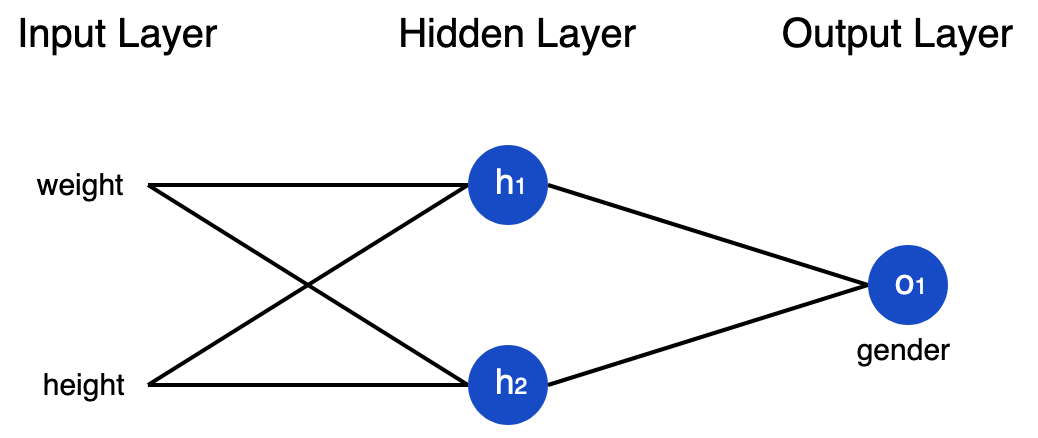

In [52]:
img_url = 'neuralnetworktraining.png'
# by default Image data are embedded
Embed      = Image(img_url)
Embed

We’ll represent Male with a 0 and Female with a 1, and we will also shift the data to make it easier to use:

| Name          | Weight (minus 141)| Height (minus 68 ) | Gender | 
| ------------- |:-------------:| ---------: | -------|
| Alice         | -9           |  -3        |   1    |
| Bob           | 19           |    4      |      0 |
| Charlie       | 11           |     7    |     0  |
| Diana         | -21           |      -8    |      1 |

Here, note that $(132+160+152+120)/4=141$ and $(65+72+75+60)/4=68$

#### Loss

Before we train our network, we first need a way to quantify how "good" it's doing so that it can try to do "better". That's what the **loss** is.

We'll use the **mean squared error** (MSE) loss:

$$ MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{true}-y_{pred})^2$$

Let's break this down:
- n is the number of samples, which is 4.
- y represents the variable being predicted, which is Gender.
- $y_{true}$ is the true value of the variable. For example, $y_{true}$ for Alice would be 1 (Female).
- $y_{pred}$ is the predicted value of the variable. It’s whatever our network outputs.

$(y_{true}-y_{pred})^2$ is known as the squared error. Our loss function is simply taking the average over all squared errors (hence the name mean squared error). The better our predictions are, the lower our loss will be!

**Training a network = trying to minimize its loss.**

#### An Example Loss Calculation

Let’s say our network always outputs 0 - in other words, it's confident all humans are Male 🤔. What would our loss be?

Let  diff =   $(y_{true}-y_{pred})^2$

| Name          | $y_{true}$    | $y_{pred}$ | diff|
| --------------|---------------| -------------| ---------------------|
| Alice         | 1             |  0         |  1                     |
| Bob           | 0             |    0       |     0 |
| Charlie       | 0             |     0      |     0  |
| Diana         | 1            |      0      |      1 |


$$ MSE = \frac{1}{4}(1+0+0+1)=0.5 $$

We now have a clear goal: minimize the loss of the neural network. We know we can change the network's weights and biases to influence its predictions, but how do we do so in a way that decreases loss?

For simplicity, let's pretend we only have Alice in our dataset:

| Name          | Weight (minus 141)| Height (minus 68 ) | Gender | 
| ------------- |:-------------:| ---------: | -------|
| Alice         | -9           |  -3        |   1    |

Then the mean squared error loss is just Alice’s squared error:

\begin{align}
MSE&=\frac{1}{1}\sum_{i=1}^1(y_{true}−y_{pred})^2\\
&=(y_{true}−y_{pred})^2\\
& =(1−y_{pred})^2
\end{align}

Another way to think about loss is as a function of weights and biases. Let’s label each weight and bias in our network:

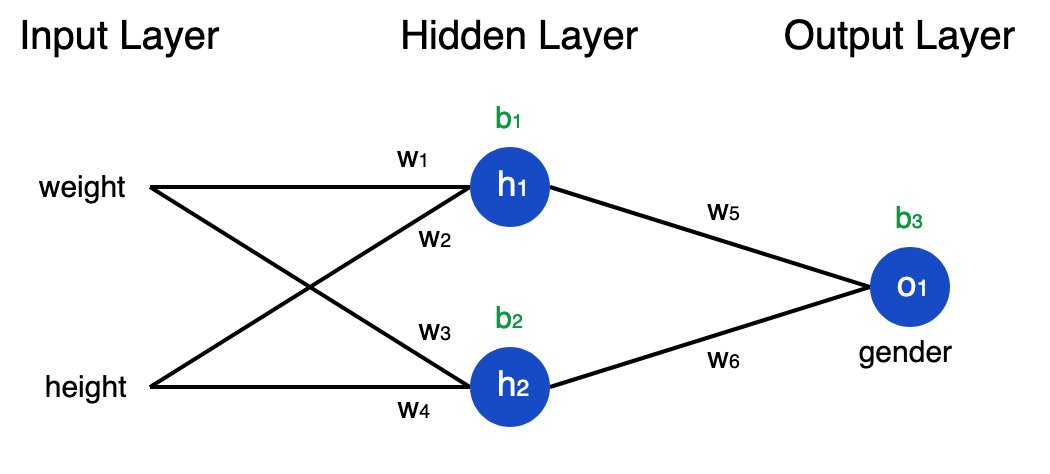

In [53]:
img_url = 'neuralnetworktraning2.png'
# by default Image data are embedded
Embed      = Image(img_url)
Embed

Then, we can write loss as a multivariable function:
 $$L(w_1,w_2,w_3,w_4,w_5,w_6,b_1,b_2,b_3)$$

Imagine we wanted to tweak $w_1$. How would loss $L$ change if we changed $w_1$? That's a question the partial derivative $\frac{\partial L}{\partial w_1}$can answer. How do we calculate it?

To start, let's rewrite the partial derivative in terms of $\frac{\partial y_{pred}}{\partial w_1}$ instead:
 $$\dfrac{\partial L}{\partial w_1}= \dfrac{\partial L}{\partial y_{pred}}*\dfrac{\partial y_{pred}}{\partial w_1} $$


We can calculate $\frac{\partial L}{\partial y_{pred}}$ because we computed $L = (1 - y_{pred})^2$ above:

$$\dfrac{\partial L}{\partial y_{pred}} = \dfrac{\partial (1 - y_{pred})^2}{\partial y_{pred}}= -2(1-y_{pred})$$

Now, let's figure out what to do with $\frac{\partial y_{pred}}{\partial w_1}$. Just like before, let $h_1, h_2, o_1$ be the outputs of the neurons they represent. Then

$$ y_{pred}=o_1=f(w_5*h_1+w_6*h2+b_3)$$

Since $w_1$ only affects $h_1$ (not $h_2$), we can write


$$\dfrac{\partial y_{pred}}{\partial w_1} =\dfrac{\partial y_{pred}}{\partial h_1} *\dfrac{\partial h_1}{\partial w_1} $$
Also note that by using chain rule,
$$ \dfrac{\partial y_{pred}}{\partial h_1} = w_5*f'(w_5h_1+w_6h_2+b_3)$$
Recall $h_1 = f(w_1x_1+w_2x_2+b_1)$. Thus, we can do the same thing for $\frac{\partial h_1}{\partial w_1}  $:
$$ \dfrac{\partial h_1}{\partial w_1} = x_1*f'(w_1x_1+w_2x_2+b_1)$$
$x_1$ here is weight, and $x_2$ is height. This is the second time we've seen $f'(x)$ (the derivate of the sigmoid function) now! Let’s derive it:

$$ f(x) = \dfrac{1}{1+e^{-x}}$$
By taking derivative, we get
$$f'(x)= \dfrac{e^{-x}}{(1 + e^{-x})^2}=f(x) * (1 - f(x))$$


We'll use this nice form for $f'(x)$ later. This form shows we do not need to take a derivative. 

We're done! We've managed to break down $\frac{\partial L}{\partial w_1}$ into several parts we can calculate it now:
$$\dfrac{\partial L}{\partial w_1} = \dfrac{\partial L}{\partial y_{pred}}*\dfrac{\partial y_{pred}}{\partial h_1}*\dfrac{\partial h_1}{\partial w_1}  $$

This system of calculating partial derivatives by working backwards is known as backpropagation, or "backprop".

### Example: Calculating the Partial Derivative

We're going to continue pretending only Alice is in our dataset:

| Name          | Weight (minus 141)| Height (minus 68 ) | Gender | 
| ------------- |:-------------:| ---------: | -------|
| Alice         | -9           |  -3        |   1    |

Let's initialize all the weights to 1 and all the biases to 0. If we do a feedforward pass through the network, we get:

$$ h_1 =f(w_1*x_1+w_2*x_2+b_1)=f(−9+−3+0)=6.16*10^{-6}$$
and similarly
$$h_2 =f(w_3*x_1+w_4*x_2+b_2)=f(−9+−3+0)=6.16*10^{-6} $$
and now let us calculate $o_1$
$$o_1 =f(w_5*h_1+w_6*h_2+b_3)=f(6.16*10^{-6}+6.16*10^{-6}+0)=0.50$$

The network outputs $y_{pred} = 0.50$, which doesn't  favor Male(0) or Female (1). This totally makes sense because we do not do any training yet.

Let's calculate $\frac{\partial L}{\partial w_1}$:



\begin{aligned}
\dfrac{\partial L}{\partial w_1} =& \dfrac{\partial L}{\partial y_{pred}}*\dfrac{\partial y_{pred}}{\partial h_1}*\dfrac{\partial h_1}{\partial w_1}\\
\end{aligned}
Now let us calculate each of the terms on the RHS one by one.
\begin{aligned} 
\dfrac{\partial L}{\partial y_{pred}} &= -2(1 - y_{pred}) \\ 
&= -2(1 - 0.50) \\ &= -1 \\ 
\end{aligned}
and 
\begin{aligned} 
\dfrac{\partial y_{pred}}{\partial h_1} &= w_5 * f'(w_5h_1 + w_6h_2 + b_3) \\ 
&= 1 * f'(6.16* 10^{-6} + 6.16* 10^{-6}+ 0) \\ 
&= f(1.23* 10^{-5}) * (1 - f(1.23* 10^{-5})) \\ 
&= 0.249 \\ 
\end{aligned}
lastly
\begin{aligned} 
\dfrac{\partial h_1}{\partial w_1} &= x_1 * f'(w_1x_1 + w_2x_2 + b_1) \\ 
&= -9 * f'(-9 + -3 + 0) \\ 
&= -9 * f(-12) * (1 - f(-12)) \\ 
&= -5.52* 10^{-5} \\ 
\end{aligned}
Now, we can collect them all and write
\begin{aligned} 
\dfrac{\partial L}{\partial w_1} &= -1 * 0.249 * -5.52* 10^{-5} \\ &= \boxed{1.37* 10^{-5}} \\ 
\end{aligned}

We did it! This tells us that if we were to increase $w_1$, $L$ would increase a tiny bit as a result.

### Training: Stochastic Gradient Descent

We have all the tools we need to train a neural network now! We’ll use an optimization algorithm called stochastic gradient descent (SGD) that tells us how to change our weights and biases to minimize loss. It’s basically just this update equation

$$ w_1\leftarrow w_1-\eta \dfrac{\partial L}{\partial w_1}$$

$\eta$ is a constant called the learning rate that controls how fast we train. All we're doing is subtracting $\eta \frac{\partial L}{\partial w_1}$ from $w_1$:

- If $\frac{\partial L}{\partial w_1}$ is positive, $w_1$ will decrease, which makes $L$ decrease.
- If $\frac{\partial L}{\partial w_1}$ is negative, $w_1$ will increase, which makes $L$ increase.

If we do this for every weight and bias in the network, the loss will slowly decrease and our network will improve.

Our training process will look like this:

1. Choose one sample from our dataset. This is what makes it stochastic gradient descent - we only operate on one sample at a time.
2. Calculate all the partial derivatives of loss with respect to weights or biases (e.g. $\frac{\partial L}{\partial w_1}$,$\frac{\partial L}{\partial w_2}$, etc).
3. Use the update equation to update each weight and bias.
4. Go back to step 1.


First, we will estimate DECISION using RATING variable. 

## Splitting Data Set

In [54]:
# let us divide this into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(
    df.loc[:, df.columns != 'DECISION'], 
    df['DECISION'], test_size = 0.2, random_state=0)

In [55]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(607, 72)
(607,)
(152, 72)
(152,)


In [56]:
#X_train.info()
#Y_train

In [57]:
#cleanup_nums = {"DECISION": {"Admit": 1, "Waitlist": 2, "Reject": 3 }}
#df.replace(cleanup_nums, inplace=True)

In [58]:
#df["DECISION"] = df["DECISION"].astype('category')

In [59]:
#df.info()

## Scaling

In [60]:
#This is a crucial step in rescaling input data so that all the features are mean zero with a unit variance. 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
Y_train

118      Reject
240      Reject
196      Reject
333       Admit
301      Reject
         ...   
707      Reject
192      Reject
629    Waitlist
559    Waitlist
684      Reject
Name: DECISION, Length: 607, dtype: object

In [62]:
s

NameError: name 's' is not defined

## Applying Machine Learning to predict DECISION using RATING

## Adaptive Boosting

In [ ]:

classifier = AdaBoostClassifier(base_estimator = None, 
                            algorithm = 'SAMME',n_estimators=100, learning_rate=1.0)
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
adaboost = cm.trace()/cm.sum()
print('Accuracy on a test set: ', adaboost)

## Decision Tree

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
#print(accuracy_score(Y_test, Y_pred))
d_tree = cm.trace()/cm.sum()
print('Accuracy on a test set: ', d_tree)

## Gaussian Naive Bayes

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
gnb=cm.trace()/cm.sum()
print('Accuracy on a test set: ', gnb)

## K Nearest Neighbor

In [ ]:
classifier = KNeighborsClassifier(leaf_size = 100, p=2)
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
knn = cm.trace()/cm.sum()
print('Accuracy on a test set: ', knn)

## Linear Support Vector Machine

In [ ]:
classifier = LinearSVC(max_iter = 10000, class_weight = 'balanced', random_state = 0)
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
lsvm = cm.trace()/cm.sum()
print('Accuracy on a test set: ', lsvm)

## Logistic Regression

In [ ]:
classifier = LogisticRegression(C=0.65,random_state = 0, solver='lbfgs', 
                                multi_class='multinomial',class_weight='balanced', max_iter = 10000)
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
log_regr= cm.trace()/cm.sum()
print('Accuracy on a test set: ', log_regr)

## Random Forest

In [ ]:
#classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', 
                                    class_weight='balanced',random_state = 0,
                                     bootstrap=True)
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
rf = cm.trace()/cm.sum()
print('Accuracy on a test set: ', rf)

## Perceptron

In [ ]:
classifier = Perceptron(random_state = 0, class_weight = 'balanced')
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
perc = cm.trace()/cm.sum()
print('Accuracy on a test set: ', perc)

## Stochastic Gradient Descent 

In [ ]:
classifier = linear_model.SGDClassifier(max_iter=5, tol=None,random_state = 0, 
                                        alpha=0.0001, average=True,class_weight = 'balanced')
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
sgd = cm.trace()/cm.sum()
print('Accuracy on a test set: ', sgd)

## Support Vector Machine

In [ ]:
classifier = SVC(max_iter = 10000, random_state = 0, gamma = 'auto')
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
svm = cm.trace()/cm.sum()
print('Accuracy on a test set: ', svm)

## XG Boost Classifier

In [63]:
Y_train

118      Reject
240      Reject
196      Reject
333       Admit
301      Reject
         ...   
707      Reject
192      Reject
629    Waitlist
559    Waitlist
684      Reject
Name: DECISION, Length: 607, dtype: object

In [ ]:
classifier = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0,
                           subsample=0.8, colsample_bytree=0.8, 
                           nthread=4, scale_pos_weight=1, seed=27)
classifier.fit(X_train, Y_train)
print(classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
xgboost = cm.trace()/cm.sum()
xgboost

## Which is the best model?

In [ ]:
table = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Linear Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
              'Decision Tree', 'Adaptive Boosting Classifier','XG Boost Classifier'],
    'Score': [svm,lsvm, knn, log_regr, 
              rf, gnb, perc, sgd, 
              d_tree, adaboost, xgboost]})
table_df = table.sort_values(by='Score', ascending=False)
table_df = table_df.set_index('Model')
table_df

# Models with Grid search

In [ ]:
## We willl use this function to see what parameters gives a best score
def best_score(classifier):
    
    print('Accuracy on a train set: ', classifier.best_score_)    
    print('Best parameters: ', classifier.best_params_)
    print('Best Estimator:',classifier.best_estimator_)
    
    return classifier.best_score_

## Ada Boost

In [ ]:
param_grid = {'n_estimators': [30, 50, 100], 'learning_rate': [0.08, 0.1, 1, 5, 10]}
ada_grid = GridSearchCV(AdaBoostClassifier(algorithm = 'SAMME'), param_grid, cv=10, refit=True, verbose=1)
ada_grid.fit(X_train,Y_train)
score_ada_grid = best_score(ada_grid)

y_pred_grid = ada_grid.predict(X_test)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
ada_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', ada_grid_accuracy)

## Decision Tree 

In [ ]:
decs_tree = DecisionTreeClassifier(random_state = 0)
#param_grid = {'min_samples_split': [4,7,10,12], criterion : ['entropy','gini']}
param_grid = {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
decs_tree_grid = GridSearchCV(decs_tree, param_grid, cv=10, refit=True, verbose=1)
decs_tree_grid.fit(X_train, Y_train)
#print(decs_tree_grid.score(X_train_sc, Y_train))
score_decs_tree_grid= best_score(decs_tree_grid)

y_pred_grid = decs_tree_grid.predict(X_test)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
decs_tree_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', decs_tree_grid_accuracy)

## KNN

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'leaf_size':list(range(3,15,1)), 'n_neighbors':list(range(1, 15, 1)), 
              'weights':['uniform', 'distance']}


knn_grid = GridSearchCV(knn, param_grid, cv=10, verbose=1, scoring='accuracy')
knn_grid.fit(X_train, Y_train)

score_knn_grid = best_score(knn_grid)


y_pred_grid = knn_grid.predict(X_test)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
knn_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', knn_grid_accuracy)

## Light Gradient Boosting 

In [ ]:
param_grid = {"max_depth": [8,10,15], "learning_rate" : [0.008,0.01,0.012], 
              "num_leaves": [80,100,120], "n_estimators": [200,250]  }
lgbm_grid = GridSearchCV(lgb.LGBMClassifier(silent=False), param_grid, cv=10, refit=True, verbose=1)
lgbm_grid.fit(X_train,Y_train, verbose=True)
score_lgbm_grid = best_score(lgbm_grid)


y_pred_grid = lgbm_grid.predict(X_test)

cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
lgbm_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy is: ', lgbm_grid_accuracy)

## Linear SVM

In [ ]:
param_grid = {'C': [0.1,10, 100, 1000,5000]}
lsvm_grid = GridSearchCV(LinearSVC(max_iter = 10000), param_grid, cv=10, refit=True, verbose=1)
lsvm_grid.fit(X_train,Y_train)
score_lsvm_grid= best_score(lsvm_grid)
y_pred_grid = lsvm_grid.predict(X_test)


cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
lsvm_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', lsvm_grid_accuracy)

## Logistic Regression

In [ ]:
param_grid = {'C': np.logspace(0, 4, 1),   'penalty' : [ 'l2']
              , 'multi_class':['multinomial','auto','ovr'] }
log_reg = LogisticRegression(random_state = 42,class_weight='balanced',solver ='lbfgs', max_iter = 10000)


log_reg_grid = GridSearchCV(log_reg, param_grid, cv=10, refit=True, verbose=1)
log_reg_grid.fit(X_train,Y_train)
score_log_reg_grid = best_score(log_reg_grid)

y_pred_grid = log_reg_grid.predict(X_test)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
log_reg_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', log_reg_grid_accuracy)

## Random Forest

In [ ]:
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [6,7,8,9,10],  
              'min_samples_split': [5, 6, 7, 8],'n_estimators':[30,50,100]}


rf_grid = GridSearchCV(RandomForestClassifier(criterion = 'entropy',class_weight='balanced',bootstrap=True), param_grid, cv=10, refit=True, verbose=1)
rf_grid.fit(X_train,Y_train)
score_rf_grid = best_score(rf_grid)

y_pred_grid = rf_grid.predict(X_test)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
rf_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', rf_grid_accuracy)

In [ ]:
#classifier = linear_model.SGDClassifier(max_iter=5, tol=None,random_state = 0, 
                          #              alpha=0.0001, average=True,class_weight = 'balanced')
#classifier.fit(X_train, Y_train)

## SGD 

In [ ]:
param_grid = {
    'loss': ['log'],
    'penalty': ['elasticnet'],
    'alpha': [10 ** x for x in range(-5, 1)],
    'l1_ratio': [0, 0.05, 0.1,  0.5, 0.8, 0.9,  1],
}
sgd = linear_model.SGDClassifier(random_state=0, class_weight='balanced')

sgd_grid = GridSearchCV(sgd, param_grid=param_grid,
                                    n_jobs=1 )
sgd_grid.fit(X_train, Y_train)
score_sgd_grid = best_score(sgd_grid)

y_pred_grid = sgd_grid.predict(X_test)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
sgd_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', sgd_grid_accuracy)

## Support Vector Machines

In [ ]:
param_grid = {'C': [0.1,10, 100, 1000,5000]}
svm_grid = GridSearchCV(SVC(max_iter = 10000), param_grid, cv=10, refit=True, verbose=1)
svm_grid.fit(X_train,Y_train)
score_lsvm_grid= best_score(svm_grid)
y_pred_grid = svm_grid.predict(X_test)


cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
svm_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', svm_grid_accuracy)

## XGB Classifier

In [ ]:
xgb = XGBClassifier(learning_rate = 0.1,min_child_weight=1, 
                           subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',
                           nthread=4, b_pos_weight=1, seed=27)
#gbc = GradientBoostingClassifier()
param_grid = {'n_estimators': [50, 100,500], 
              'min_samples_split': [3, 4, 5, 6, 7],
              'max_depth': [3, 4, 5, 6]}

xgb_grid = GridSearchCV(xgb, param_grid, cv=10, refit=True, verbose=1)
xgb_grid.fit(X_train, Y_train)
score_xgb_grid = best_score(xgb_grid)


y_pred_grid = xgb_grid.predict(X_test)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
xgb_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', xgb_grid_accuracy)

## Which one is the best model with GridSearch?

In [ ]:
table2 = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Linear Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest',  'Stochastic Gradient Decent', 'Decision Tree', 
              'Adaptive Boosting Classifier','XG Boost Classifier','Light GBM'],
    'Score': [svm_grid_accuracy,lsvm_grid_accuracy, knn_grid_accuracy, log_reg_grid_accuracy, 
              rf_grid_accuracy, sgd_grid_accuracy, decs_tree_grid_accuracy, 
              ada_grid_accuracy, xgb_grid_accuracy,lgbm_grid_accuracy]})
table_df2 = table2.sort_values(by='Score', ascending=False)
table_df2 = table_df2.set_index('Model')
table_df2
#type(table_df2)
#table_df2.shape
#table_df.shape

Let us combine these two table.

In [ ]:
pd.concat([table_df, table_df2],axis =1, sort=False, keys = ['Score','Score with grid search']) # concat dataframes

## Stacking Approach

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')


In [ ]:
# Set up models
ada = AdaBoostClassifier(base_estimator = None, 
                            algorithm = 'SAMME',n_estimators=100, learning_rate=1.0)
dtree = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
gnb = GaussianNB()
knn = KNeighborsClassifier(leaf_size = 100, p=2)
#cls5 = LinearSVC(max_iter = 10000, class_weight = 'balanced', random_state = 0)
logreg = LogisticRegression(C=0.65,random_state = 0, solver='lbfgs', 
                                multi_class='multinomial',class_weight='balanced', max_iter = 10000)
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', 
                                    class_weight='balanced',random_state = 0,
                                     bootstrap=True)
#cls8 = Perceptron(random_state = 0, class_weight = 'balanced')
sgd = linear_model.SGDClassifier(max_iter=5, tol=None,random_state = 0, 
                                        alpha=0.0001, average=True,
                                  class_weight = 'balanced',loss ='modified_huber')
svm = SVC(max_iter = 10000, random_state = 0, gamma = 'auto',probability=True)
xgb = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0,
                           subsample=0.8, colsample_bytree=0.8, 
                           nthread=4, scale_pos_weight=1, seed=27)

In [ ]:
# Logit will be used for stacking
sclf = StackingCVClassifier(classifiers=[ada, dtree, gnb,knn, logreg, rf,sgd,svm,xgb], 
                            meta_classifier=ada, use_probas=True, cv=5)



# Do CV
for clf, label in zip([ada, dtree, gnb,knn, logreg, rf,sgd,svm,xgb, sclf], 
                      ['ADA Boost','Decision tree','Gaussian Naive Bayes',
                       'KNN','Logistic Regression',
                       'Random Forest','SGD','SVM','XGB',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_train, Y_train, cv=5)
    print("Accuracy: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))


In [ ]:
# Fit on train data / predict on test data
#sclf_fit = sclf.fit(X_train, Y_train)
#mypreds = sclf_fit.predict_proba(X_test)

In [ ]:
def accuracy(Y_train, Y_pred):
    cm = confusion_matrix(Y_train, Y_pred)
    return cm.trace()/cm.sum()


#print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
#Y_pred = classifier.predict(X_test)
#cm = confusion_matrix(Y_test, Y_pred)
#print(cm)
#log_regr= cm.trace()/cm.sum()
#print('Accuracy on a test set: ', log_regr)

In [ ]:
X = X_train
y = Y_train

stack_gen_model = sclf.fit(np.array(X), np.array(y))
ada_model_full_data = ada.fit(X, y)
dtree_model_full_data = dtree.fit(X, y)
gnb_model_full_data = gnb.fit(X, y)
knn_model_full_data = knn.fit(X, y)
logreg_model_full_data = logreg.fit(X, y)
rf_model_full_data = rf.fit(X, y)
sgd_model_full_data = sgd.fit(X,y)
svm_model_full_data = svm.fit(X, y)
xgb_model_full_data = xgb.fit(X, y)


In [ ]:
#stack_gen_model.predict(X_test)

In [ ]:
#ada_model_full_data.predict(X).shape

In [ ]:
ada = pd.DataFrame(ada_model_full_data.predict(X),columns = ['ada'])
dtree = pd.DataFrame(dtree_model_full_data.predict(X),columns = ['dtree'])
gnb = pd.DataFrame(gnb_model_full_data.predict(X),columns = ['gnb'])
knn = pd.DataFrame(knn_model_full_data.predict(X),columns = ['knn'])
logreg = pd.DataFrame(logreg_model_full_data.predict(X),columns = ['logreg'])
rf = pd.DataFrame(rf_model_full_data.predict(X),columns = ['rf'])
sgd = pd.DataFrame(sgd_model_full_data.predict(X),columns = ['sgd'])
svm = pd.DataFrame(svm_model_full_data.predict(X),columns = ['svm'])
xgb = pd.DataFrame(xgb_model_full_data.predict(X),columns = ['xgb'])
stack = pd.DataFrame(stack_gen_model.predict(X),columns = ['stack'])

In [ ]:
ada.insert(0, 'New_ID', range(1, 1 + len(ada)))
dtree.insert(0, 'New_ID', range(1, 1 + len(dtree)))
gnb.insert(0, 'New_ID', range(1, 1 + len(gnb)))
knn.insert(0, 'New_ID', range(1, 1 + len(knn)))
logreg.insert(0, 'New_ID', range(1, 1 + len(logreg)))
rf.insert(0, 'New_ID', range(1, 1 + len(rf)))
sgd.insert(0, 'New_ID', range(1, 1 + len(sgd)))
svm.insert(0, 'New_ID', range(1, 1 + len(svm)))
xgb.insert(0, 'New_ID', range(1, 1 + len(xgb)))
stack.insert(0, 'New_ID', range(1, 1 + len(stack)))

In [ ]:
#pd.concat([ada,dtree], axis=1, join='outer', ignore_index=False)

In [ ]:
new_df = ada.merge(dtree, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df.columns = new_df.columns.str.strip()

In [ ]:
new_df = new_df.merge(gnb, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df.columns = new_df.columns.str.strip()

In [ ]:
new_df = new_df.merge(rf, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df = new_df.merge(knn, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df = new_df.merge(logreg, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df = new_df.merge(sgd, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df = new_df.merge(svm, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df = new_df.merge(xgb, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df = new_df.merge(stack, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df.columns = new_df.columns.str.strip()

In [ ]:
new_df

In [ ]:
new_df = new_df.drop(columns="New_ID")

In [ ]:
new_df.mode(axis=1)[0]

In [ ]:
# import statistics 
# from statistics import mode 
  
# def most_common(List): 
#     return(mode(List)) 
    
# def mixed_models_predict(X):
#     return list(ada_model_full_data.predict(X), 
#                 dtree_model_full_data.predict(X),
#                 gnb_model_full_data.predict(X),
#                 knn_model_full_data.predict(X),
#                 logreg_model_full_data.predict(X),
#                 rf_model_full_data.predict(X),
#                 sgd_model_full_data.predict(X),
#                 svm_model_full_data.predict(X),
#                 xgb_model_full_data.predict(X),
#                 stack_gen_model.predict(np.array(X)))

In [ ]:
X =  X_test
ada = pd.DataFrame(ada_model_full_data.predict(X),columns = ['ada'])
dtree = pd.DataFrame(dtree_model_full_data.predict(X),columns = ['dtree'])
gnb = pd.DataFrame(gnb_model_full_data.predict(X),columns = ['gnb'])
knn = pd.DataFrame(knn_model_full_data.predict(X),columns = ['knn'])
logreg = pd.DataFrame(logreg_model_full_data.predict(X),columns = ['logreg'])
rf = pd.DataFrame(rf_model_full_data.predict(X),columns = ['rf'])
sgd = pd.DataFrame(sgd_model_full_data.predict(X),columns = ['sgd'])
svm = pd.DataFrame(svm_model_full_data.predict(X),columns = ['svm'])
xgb = pd.DataFrame(xgb_model_full_data.predict(X),columns = ['xgb'])
stack = pd.DataFrame(stack_gen_model.predict(X),columns = ['stack'])
ada.insert(0, 'New_ID', range(1, 1 + len(ada)))
dtree.insert(0, 'New_ID', range(1, 1 + len(dtree)))
gnb.insert(0, 'New_ID', range(1, 1 + len(gnb)))
knn.insert(0, 'New_ID', range(1, 1 + len(knn)))
logreg.insert(0, 'New_ID', range(1, 1 + len(logreg)))
rf.insert(0, 'New_ID', range(1, 1 + len(rf)))
sgd.insert(0, 'New_ID', range(1, 1 + len(sgd)))
svm.insert(0, 'New_ID', range(1, 1 + len(svm)))
xgb.insert(0, 'New_ID', range(1, 1 + len(xgb)))
stack.insert(0, 'New_ID', range(1, 1 + len(stack)))
new_df = ada.merge(dtree, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df.columns = new_df.columns.str.strip()
new_df = ada.merge(dtree, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df.columns = new_df.columns.str.strip()
new_df = new_df.merge(rf, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df = new_df.merge(knn, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df = new_df.merge(logreg, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df = new_df.merge(sgd, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df = new_df.merge(svm, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df = new_df.merge(xgb, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df = new_df.merge(stack, on = ['New_ID'], suffixes=(' ', ' '), how = 'outer')
new_df.columns = new_df.columns.str.strip()
new_df = new_df.drop(columns="New_ID")
Y_pred = new_df.mode(axis=1)[0]

In [ ]:
print(accuracy(Y_test, Y_pred))

In [ ]:
#mixed_models_predict(X_test)

## Using h2o AutoML packages

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

In [ ]:
import os
import h2o
import pandas as pd

In [ ]:
type(df)
X_train_hf = h2o.H2OFrame(X_train)
#X_train.head()

In [ ]:
Y_train_df =  Y_train.to_frame()
Y_train_hf = h2o.H2OFrame(Y_train_df)
#Y_train_hf.head()

In [ ]:
X_test_hf = h2o.H2OFrame(X_test)
Y_test_df =  Y_test.to_frame()
Y_test_hf = h2o.H2OFrame(Y_test_df)

In [ ]:
type(Y_test_hf)

In [ ]:
train = X_train_hf.cbind(Y_train_hf)

In [ ]:
test = X_test_hf.cbind(Y_test_hf)

In [ ]:
y = "DECISION"
x = X_train_hf.columns

In [ ]:
#train, test = df_hf.split_frame(ratios=[.8], seed=1)

In [ ]:
# For binary classification, response should be a factor
#train[y] = train[y].asfactor()
#test[y] = test[y].asfactor()

In [ ]:
aml_first = H2OAutoML(max_models = 30, max_runtime_secs=300, seed = 1)
aml_first.train(x = x, y = y, training_frame = train)
lb = aml_first.leaderboard
lb.head()
lb.head(rows=lb.nrows) # Entire leaderboard

In [ ]:
preds_first_train = aml_first.predict(test)
preds_first_train.describe()

In [ ]:

performance = aml_first.leader.model_performance(test)
performance.show()

In [ ]:
cm = performance.confusion_matrix()
cm

In [ ]:
df.head()

For the first part, we will estimate rating. With estimated rating column we will estimate DECISION column.

In [ ]:
# y1_decision = students['DECISION']
# df = df.drop('DECISION', axis =1)
#df.info()

In [ ]:
df = df.drop('DECISION', axis =1)
df.info()

In [ ]:
#df_NA.info()

In [ ]:
# let us divide this into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(
     df.loc[:, df.columns != 'RATING'], 
     df['RATING'], test_size = 0.2, random_state=0)

## Estimate the RATING variable.

In [ ]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X_train, y=Y_train):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [ ]:
alphas_ridge = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_elastic = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
elastic_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_krr = [0.6, 0.65,0.7, 0.75,0.7, 0.75,0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [ ]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_ridge, cv=kfolds)) #This model may be very sensitive to outliers. 
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas_lasso, random_state=42, cv=kfolds))
#ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=alphas_elastic, cv=kfolds, l1_ratio=elastic_l1ratio))                                
krr = KernelRidge(alpha=alphas_krr, kernel='polynomial', degree=2, coef0=2.5)
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, 
                                max_features='sqrt', min_samples_leaf=15, min_samples_split=10, 
                                loss='huber', random_state =42) 


lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )


xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0.05,
                                     gamma=0.04, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, random_state =42,
                                     reg_alpha=0.06, reg_lambda=0.8571)

tsr = TheilSenRegressor(random_state=42)
rnsc = RANSACRegressor(random_state=42)
huber = HuberRegressor()
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(criterion = 'mse',random_state = 0)
sgd_reg = linear_model.SGDRegressor(max_iter=1000, random_state = 42, eta0=0.000001, average=True)

In [ ]:
score = cv_rmse(ridge)
print("Ridge Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
ridge_score= score.mean()

score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
lasso_score=score.mean()

score = cv_rmse(elasticnet)
print("Elasticnet: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
elasticnet_score=score.mean()

score = cv_rmse(rnsc)
print("RNSC: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
ransac_score = score.mean()

score = cv_rmse(tsr)
print("TSR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
theilsen_score = score.mean()

score = cv_rmse(huber)
print("Huber: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
huber_score = score.mean()

score = cv_rmse(krr)
print("Kernel Ridge Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
krr_score = score.mean()

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
svr_score = score.mean()

score = cv_rmse(lightgbm)
print("Light GBM: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
lightgm_score = score.mean()

score = cv_rmse(sgd_reg)
print("SGD  : {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
sgd_score = score.mean()

score = cv_rmse(lin_reg)
print("Linear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
lin_score =score.mean()

score = cv_rmse(tree_reg)
print("Decision Tree : {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
tree_score =score.mean()

score = cv_rmse(forest_reg)
print("Random Forest : {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
forest = score.mean()

score = cv_rmse(gbr)
print("Gradient Boosting: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
gbr_score =score.mean()

score = cv_rmse(xgboost)
print("XG boost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
xgb_score =score.mean()

In [ ]:
table = pd.DataFrame({
    'Model': ['Ridge Regression', 'LASSO Regression', 'Elastic Net', 'Ransac Regression', 
              'Thielsen Regressor', 'Huber Regressor', 'Kernel Ridge Regression', 'Epsilon-Support Vector Regression', 
              'Light GBM', 'SGD','Linear Regression', 'Decision Tree Regressor',
             'Random Forest regressor', 'Gradient Boosting','XGBoost Regressor'],
    'Score': [ridge_score,lasso_score, elasticnet_score, ransac_score, 
              theilsen_score, huber_score, krr_score, svr_score, 
              lightgm_score, sgd_score, lin_score,tree_score,
             forest, gbr_score, xgb_score]})
table_df = table.sort_values(by='Score', ascending=True)
table_df = table_df.set_index('Model')
table_df

## Simplest Stacking approach

In [ ]:
stack_gen = StackingCVRegressor(regressors=(svr,huber, ridge, sgd_reg, lasso, elasticnet, lin_reg,
                                            tsr,forest_reg,lightgbm,xgboost),
                                meta_regressor=svr,
                                use_features_in_secondary=True)

In [ ]:
X = X_train
y = Y_train

stack_gen_model = stack_gen.fit(np.array(X), np.array(y))
svr_model_full_data = svr.fit(X, y)
huber_model_full_data = huber.fit(X, y)
ridge_model_full_data = ridge.fit(X, y)
sgd_model_full_data = sgd_reg.fit(X, y)
lasso_model_full_data = lasso.fit(X, y)
elastic_model_full_data = elasticnet.fit(X, y)
lin_model_full_data = lin_reg.fit(X,y)
tsr_model_full_data = tsr.fit(X, y)
rf_model_full_data = forest_reg.fit(X, y)
xgb_model_full_data = xgboost.fit(X, y)
lgb_model_full_data = lightgbm.fit(X, y)

In [ ]:
def mixed_models_predict(X):
    return (
            (0.01 * xgb_model_full_data.predict(X)) + \
            (0.01 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.05 * tsr_model_full_data.predict(X)) + \
            (0.05 * lin_model_full_data.predict(X)) + \
            (0.05 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.05 * sgd_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * huber_model_full_data.predict(X)) + \
            (0.18 * svr_model_full_data.predict(X)) + \
            (0.29 * stack_gen_model.predict(np.array(X))))

In [ ]:
print('RMSE score on train data:')
print(rmse(y, mixed_models_predict(X)))

In [ ]:
print('RMSE score on test data:')
print(rmse(Y_test, mixed_models_predict(X_test)))

## Using H2O  AUTOML to predict RATING

In [ ]:
hf = h2o.H2OFrame(df)

In [ ]:
#df.info()
y1 = "RATING"
# Identify predictors and response
x = hf.columns
x.remove(y1) #first I removed rating 
#y2 = "DECISION"
#x.remove(y2) #now I removed decision

In [ ]:
x

In [ ]:
train, test = hf.split_frame(ratios=[.8], seed=1)

In [ ]:
aml_first = H2OAutoML(max_models = 30, max_runtime_secs=300, seed = 1)
aml_first.train(x = x, y = y1, training_frame = train)
lb = aml_first.leaderboard
lb.head()
lb.head(rows=lb.nrows) # Entire leaderboard

In [ ]:
performance = aml_first.leader.model_performance(test)
performance.show()

In [ ]:
preds_first = aml_first.predict(test)

In [ ]:
diff = (test['RATING']-preds_first)**2
mse = diff.mean()
print('MSE is:',mse)
print('RMSE is:',np.sqrt(mse))

## Predicting RATING variable using other h2o models including Deep Learning

In [ ]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
import os, time, sys
import warnings
warnings.filterwarnings("ignore")

In [ ]:
test_original = test

In [ ]:
# Split the train dataset
train, valid, test = train.split_frame(ratios=[0.7, 0.15], seed=42)

### Diving into Deep Learning Algorithms

#### L1 & L2 regularization

In [ ]:
l1_opt = [0, 0.00001,
          0.0001,
          0.001,
          0.01,
          0.1]

l2_opt = [0, 0.00001,
          0.0001,
          0.001,
          0.01,
          0.1]



In [ ]:
activation_opt = ["RectifierWithDropout",
                  "TanhWithDropout"]

#### Create the Hyperparameters

In [ ]:
dl_params = {
             'activation': activation_opt,
             "input_dropout_ratio" : [0,0.05, 0.1],  # input layer dropout ratio to improve generalization. Suggested values are 0.1 or 0.2.
             'l1': l1_opt,
             'l2': l2_opt,
             'hidden_dropout_ratios':[[0.1,0.2,0.3], # hidden layer dropout ratio to improve generalization: one value per hidden layer.
                                      [0.1,0.5,0.5],
                                      [0.5,0.5,0.5]]
             }
search_criteria = {
                   'strategy': 'RandomDiscrete',
                   'max_runtime_secs': 1000,
                   'seed':1
                   }

#### Prepare the grid object

In [ ]:
dl_grid = H2OGridSearch(model=H2ODeepLearningEstimator(
                                                    epochs = 1000,   ## hopefully converges earlier...
                                                    adaptive_rate = True,  # http://cs231n.github.io/neural-networks-3/#sgd
                                                    stopping_metric="AUTO",
                                                    stopping_tolerance=1e-2,    ## stop when misclassification does not improve by >=1% for 2 scoring events
                                                    stopping_rounds=3,
                                                    hidden=[128,128,128],      ## more hidden layers -> more complex interactions
                                                    balance_classes= False,
                                                    standardize = True,  # If enabled, automatically standardize the data (mean 0, variance 1). If disabled, the user must provide properly scaled input data.
                                                    loss = "quantile"  # quantile for regression
                                                    ),
                        grid_id='dl_grid',
                        hyper_params=dl_params,
                        search_criteria=search_criteria)

#### Train the Model

In [ ]:
start = time.time() 
dl_grid.train(x=x,y=y1, 
                training_frame=train,
                validation_frame=valid,
                stopping_rounds=2,
                stopping_tolerance=0.0005,
                seed=1
                )

end = time.time()
(end - start)/60

### See the Model performance 

In [ ]:
dl_gridperf = dl_grid.get_grid(sort_by='RMSE',decreasing = False)
dl_gridperf

#### Identify the best model generated with least error

In [ ]:
best_dl_model = dl_gridperf.models[0]
best_dl_model

In [ ]:
### 1. Gradient Boosting Machine (GBM)

# Prepare the hyperparameters
gbm_params = {
                'learn_rate': [0.01, 0.1], 
                'max_depth': [4, 5, 7],
                'sample_rate': [0.6, 0.8],               # Row sample rate
                'col_sample_rate': [0.2, 0.5, 0.9]       # Column sample rate per split (from 0.0 to 1.0)
                }



# Prepare the grid object
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator,   # Model to be trained
                          grid_id='gbm_grid1',                  # Grid Search ID
                          hyper_params=gbm_params,              # Dictionary of parameters
                          search_criteria={"strategy": "Cartesian"}   # RandomDiscrete
                          )

In [ ]:
# Train the Model
start = time.time() 
gbm_grid.train(x=x,y=y1, 
                training_frame=train,
                validation_frame=valid,
                ntrees=100,      # Specify other GBM parameters not in grid
                score_tree_interval=5,     # For early stopping
                stopping_rounds=3,         # For early stopping
                stopping_tolerance=0.0005,
                seed=1)

end = time.time()
(end - start)/60

In [ ]:

# Find the Model grid performance 
gbm_gridperf = gbm_grid.get_grid(sort_by='RMSE',decreasing = False)
gbm_gridperf



# Identify the best model generated with least error
best_gbm_model = gbm_gridperf.models[0]
best_gbm_model



In [ ]:
### 2. Random Forest Algorithm



# Prepare the hyperparameters
nfolds = 5
rf_params = {
                'max_depth': [3, 4,5],
                'sample_rate': [0.8, 1.0],               # Row sample rate
                'mtries' : [2,4,3]
                }



# Search criteria for parameter space
search_criteria = {'strategy': "RandomDiscrete",
                   "seed": 1,
                   'stopping_metric': "AUTO",
                   'stopping_tolerance': 0.0005
                   }



# Prepare the grid object
rf_grid = H2OGridSearch(model=H2ORandomForestEstimator,   # Model to be trained
                          grid_id='rf_grid',                  # Grid Search ID
                          hyper_params=rf_params,              # Dictionary of parameters
                          search_criteria=search_criteria,   # RandomDiscrete
                          )



# Train the Model
start = time.time() 
rf_grid.train(x=x,y=y1, 
                training_frame=train,
                validation_frame=valid,
                ntrees=100,      
                score_each_iteration=True,
                nfolds = nfolds,
                fold_assignment= "Modulo",
                seed=1
                )

end = time.time()
(end - start)/60



# Find the Model performance 
rf_gridperf = rf_grid.get_grid(sort_by='RMSE',decreasing = False)
rf_gridperf



# Identify the best model generated with least error
best_rf_model = rf_gridperf.models[0]
best_rf_model




#### Compare Model Performances

In [ ]:
best_gbm_perf= best_gbm_model.model_performance(test)  # GBM Model
best_rf_perf = best_rf_model.model_performance(test)   # Random Forest Model
best_dl_perf = best_dl_model.model_performance(test)   #deep Learning Model

#### Retreive test set AUC

In [ ]:
print(best_gbm_perf.gini)
print(best_rf_perf.gini)
print(best_dl_perf.gini)

#### Prediction of Model

In [ ]:
gbm_pred= best_gbm_model.predict(test_original).as_data_frame()
rf_pred = best_rf_model.predict(test_original).as_data_frame()
dl_pred = best_dl_model.predict(test_original).as_data_frame()

In [ ]:
type(gbm_pred['predict'])

In [ ]:
rating_original = test_original['RATING'].as_data_frame()

In [ ]:
diff = (rating_original['RATING']-gbm_pred['predict'])**2
mse = diff.mean()
print('MSE is:',mse)
print('RMSE is:',np.sqrt(mse))

In [ ]:
#rating_original['RATING']

In [ ]:
diff = (rating_original['RATING']-rf_pred['predict'])**2
mse = diff.mean()
print('MSE is:',mse)
print('RMSE is:',np.sqrt(mse))

In [ ]:
diff = (rating_original['RATING']-dl_pred['predict'])**2
mse = diff.mean()
print('MSE is:',mse)
print('RMSE is:',np.sqrt(mse))

## References 

1. https://www.kaggle.com/dejavu23/titanic-survival-seaborn-and-ensembles
2. http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
3. https://www.kaggle.com/manuelc/best-model-mixed-classifier
4. https://towardsdatascience.com/advanced-ensemble-classifiers-8d7372e74e40
5. https://www.kaggle.com/rohitjain2086/house-price-prediction-using-ml-techniques-h2o-ai
6. https://victorzhou.com/blog/intro-to-neural-networks/